In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

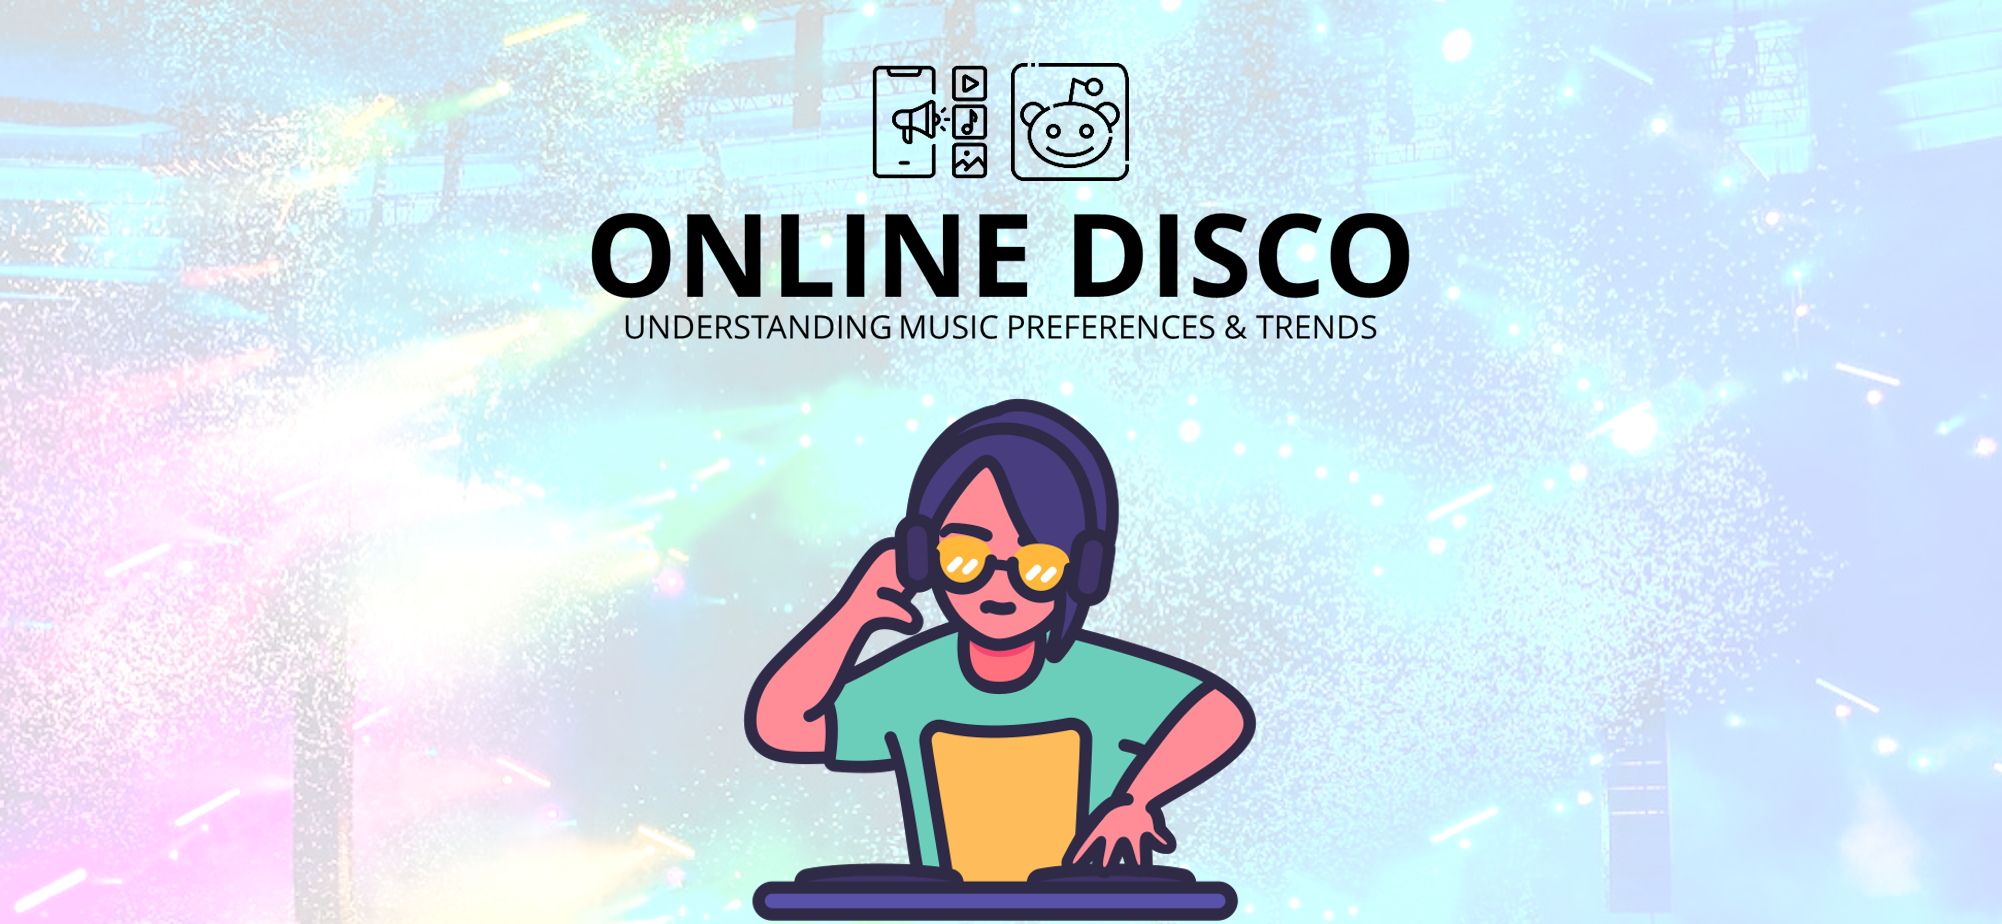

<font size=5><strong><center>An Analysis of Discogs Data & Music-Related Reddit Conversations</center></strong></font>

## Executive Summary

This project aims to understand how the number of Reddit posts about the song releases and artists in Discogs vary in relation to their release date. Does the song titles have Reddit posts before, during, and post its release? Are the artists talked about on Reddit whenever they have new music? This study assesses Reddit's reliability as a community platform for music releases and artists found in Discogs. The outcome of this project can be helpful for labels and artists in gathering more insights from posts data that can be found on Reddit. This has potential use for correlation with sales as it may provide insights on title trends in Reddit that may positively or negatively affect a song's popularity. For us to analyze the data, we read the raw files in Python and loaded them into a SQLite database. Tables in the database were used to perform exploratory data analysis and to generate insights. 

The data is limited to 2022 only. There are around 690 song titles released daily on the average. There are also 2,998 average daily posts from music-related subreddits. We have discovered that 74.37% of the 2022 song releases may have corresponding Reddit posts. Also, 68.15% of the posts on Reddit may be related to the different song releases. 

To summarize the findings, given the significant number of daily song releases, Reddit posts related to it are found to be spread all throughout the year, hence trends may not be that indicative. If we want to see a trend clearly, we need to deep dive into a specific song release or artist. We also need to take into account that the quality of data for Discogs is low but is rich. Having a domain expert who can further make sense of the data will help enrich our understanding.

## Introduction

### Background

Music is not only available to listen to via digital channels, but is also talked about across online platforms. The widely used social media platforms today give artists and their teams instant platforms to reach their audiences and create an impression. Music fans actively engage with online communities to talk about their common interest.

Whenever an artist releases new music, we don't expect to simply see traction on the day of the song release itself. Artists typically match their song releases with a pre-release strategy that creates a highly anticipated and memorable experience for their listeners. Their strategy aims to produce a wide reach and a long-lasting ripple effect for their music [[2]](https://bandzoogle.com/blog/a-pre-release-strategy-for-putting-out-your-next-single). Artists now use online platforms to constantly market their music and communicate with their fanbase.  

In terms of trends for song releases, it is important to account that there are music drop schedules that artists follow. Globally, the music industry seems to have adopted Friday as the global release day for new music [[3]](https://www.complex.com/pigeons-and-planes/2018/05/why-does-so-much-music-release-friday-each-week). For US, however, albums are released on Tuesdays [[1]](https://www.billboard.com/pro/album-release-day-why-tuesday/). Now that music is also being released on digital platforms, there are no hard rules for how and when artists should release their music digitally. Today, artists have the capacity to consider their listeners' tendencies through analytics, so they are more informed on when their release day should be [[3]](https://www.complex.com/pigeons-and-planes/2018/05/why-does-so-much-music-release-friday-each-week). This information aids our expectations for trends that we might find in our analysis later on.

While this study will not necessarily detail each artist's marketing strategies for their music (especially song releases), quantify their online relationship with their fans, nor dig into their release schedules, it will try to capture whether there are ripple effects on social media whenever an artist has a new music. For this study, we focus on analyzing traction in a platform where music communities may be fostered, Reddit.


### Problem Statement

This report mainly aims to understand how the number of Reddit posts vary before, during, and after the release of a song. Particularly:

1. Do increase in music-related Reddit conversations about an artist coincide with an artist's song releases?
2. How do we quantify the post generating capabilities of an artist?

## Data Description

The study used two datasets: the Discogs dataset, which is the biggest and most comprehensive database, and the Reddit dataset, which contains information about Reddit post submissions. Records in the Discogs dataset can be about artists or song releases. Records on Reddit, on the other hand, are post-level information including post titles and texts, engagement metrics, and posts' metadata.


### Discogs Releases & Artists Dataset
Two relevant tables under the Discogs dataset are `artists` and `releases`. For the song `releases` table, we only accounted for songs that have status `Accepted` and have specific dates of release. Releases that only indicates the year for the `released` variable were filtered out.

As for the `artists` table, artists that are not flagged `0` (i.e. they are not the main artists of the song) were filtered out. We also only consider artists with song releases that are included in the cleaned `releases` table. These tables contain the following information.

<br>
<center><i> Relevant variables from releases table</i></center>

|<center>Variable Name</center>|<center>Data Type</center>| 
|:---|:---|
|`release_id`	| INTEGER |
|`status`	| TEXT |
|`title`	| TEXT |
|`country`	| TEXT |
|`released`	| TEXT |
|`genres`	 | TEXT |
|`styles` |	TEXT |

<br>
<center><i> Relevant variables from artists table</i></center>

|<center>Variable Name</center>|<center>Data Type</center>|
|:---|:---|
|`release_id` | INTEGER	|
|`artist_id` | INTEGER	|
|`name`	| TEXT |	
|`flag`	| INTEGER |	


### Reddit Submissions Dataset
Main data table for the Reddit dataset contains post submissions that are related to music. Part of the pre-processing of Reddit data is the filtering of post submissions to those that are within music subreddits only. The keywords we used to identify music-related subreddits are `music`, `playlist`, and `Spotify` (all case-insensitive). All subreddits that have these keywords to its name are considered music related.

While observing subreddits data, particularly the subscriber count for each music subreddit, we noticed that a lot of the subreddits only have one subscriber. To further filter the Reddit data to relevant content with traction or to content that is at least shared to a community, we made sure that the music subreddits considered are ones that have a significant number of subscribers. In order to filter using these criteria, we considered the 75th percentile of music subreddit subscribers (40 subscribers). That said, our Reddit dataset contains post submissions within the top 25% music subreddits in terms of subscriber count. 

The Reddit post submissions table `reddit_submissions` includes the following information.

<br>
<center><i> Relevant variables from Reddit submissions table</i></center>

|<center>Variable Name</center>|<center>Data Type</center>|
|:---|:---|
|`title`	| TEXT|
|`selftext`	| TEXT	|
|`url`	| TEXT |
|`num_comments` |	INTEGER	|
|`num_crossposts`	| INTEGER	|
|`upvote_ratio` |	REAL|
|`author`	| TEXT	|
|`id`	| TEXT	|
|`subreddit` |	TEXT	|
|`subreddit_id` |	TEXT |
|`subreddit_subscribers` | INTEGER |


### Creating a Database for Discogs & Reddit Data
The team created an SQLite database, named `discogs-reddit-final-submission.db`, consisting of the following tables.

<br>
<center><i> Tables within the Discogs-Reddit database</i></center>

|<center>Table Name</center>|<center>Number of Columns</center>|<center>Data Source</center>|
|:---|:---|:---|
|`releases`	|7| Discogs |
|`artists`	|8|Discogs |
|`subreddits`	|5|Reddit |
|`reddit_submissions`	|105|Reddit |
|`reddit_submissions_processed`	|30|Reddit |
|`reddit_staging`	|	4|Discogs, Reddit |
|`exclude_id_fin`	|	1|Discogs, Reddit |
|`releases_reddit_fin`|	7|Discogs, Reddit |


<br>
<br>

### Data Assumptions and Limitations
This study only accounts for 2022 data. Given our limitations on computing power, we also had to do a lot of filters on our data for us to be able to process them. To add to the previously discussed points on filtering the data, another limitation is that in the filtering of subreddits, there is a possibility of filtering out artist-specific subreddits which would have contained a significant amount of posts about the artists. Specifics of our filtering approach are detailed in the methodology section. Our limited knowledge in text processing also restricts us from providing deeper analysis for the text features of the different datasets.

## Data Mining & Wrangling Methodology

This study followed the methodology pipeline described in the figure below. The different tasks performed for each step in the methodology are described in detail in this section.

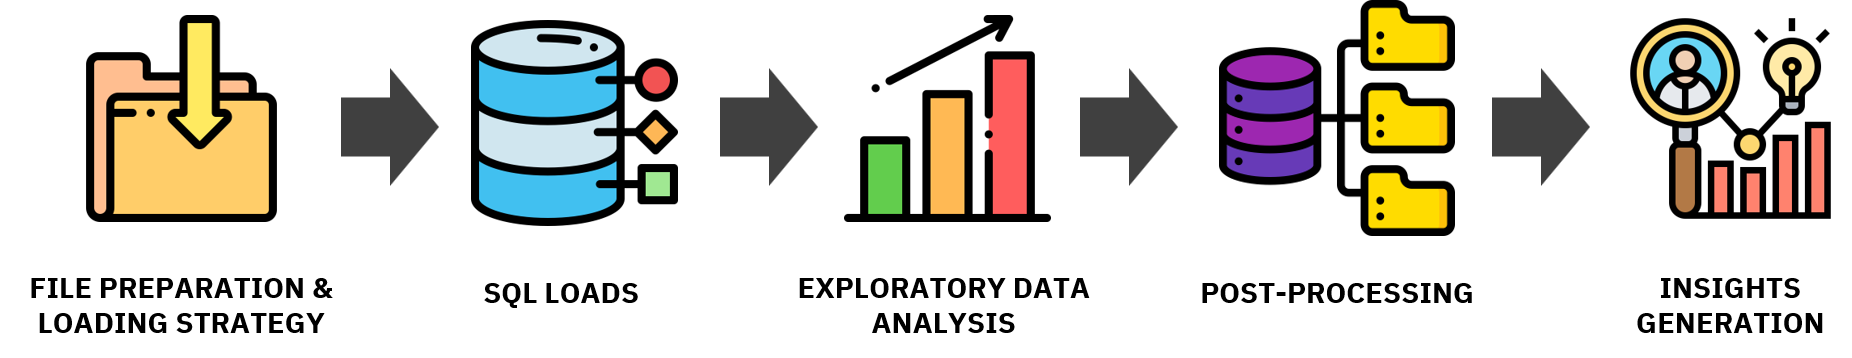

### Step 1: File Preparation & Loading Strategy
The first step in our Data Mining and Wrangling activity is to analyze the files and load them into SQL for us to perform wrangling and analyses to it. Both Discogs and Reddit have GB worth of data, and we need to strategically load them since a usual full read and load would not work in any of the files.

**Discogs Files**: Multiple 10GB+ files unpacked around 60GB+ XML Format
* `Releases` – Primary data source for all song releases 
* `Artists` – List of all artists
* `Labels` – List of all labels; Loaded but was not used due to lack of relevance to the use case

**Reddit Files**: 8 files with ~30M records each, in JSON format, compressed into a zstd
* `Submissions` – Primary data source for all Reddit posts
* `Subreddits` – Contains a record of subreddits, their id, and subscriber counts; Used as reference for all music-related subreddits in order to filter post submissions 

We have limited our analysis for both datasets to data points recorded for 2022 only. Zooming into a subset of the data is necessary for us to be able to process them despite machine limitations. 

_Strategy in loading Discogs data_
1. We are able to open the file by reading in gzip and bytes stream of data. We then rebuilt the data in XML format.
2. Analysis of samples of records allowed us to identify the structure of the database tables for SQL.<br>
    a.	We have architected second normal form tables for Discogs data. This is composed of 6 initial tables: `release`, `artist`, `tracklist`, `company`, `labels`, `formats`<br>
3.	Using the file location pointer where the instance of the 2022 release is allowed us to successfully load the data. This is particularly helpful for instances of errors; immediately restarting from this point saved us time from loading irrelevant content.
4.	All XML where `released` date is equal to `2022` were extracted in order to create a new XML file. A new file was loaded to our SQLite database, with size reduced to less than 1 GB.

_Strategy in loading Reddit data_
1.	We encountered the same challenge as in Discogs, but we directly used a decompressor to read the files in bytes and analyze the data.
2.	Similarly, analysis of samples of records allowed us to identify the structure of the database tables for SQL. We created two (2) initial tables in denormalized form: `reddit_submissions` and `subreddits`<br>
3.	We managed to directly load the data into pandas dataframes and process them.


### Step 2: SQL Loads
As with the file preparation steps, we have utilized the same code to loop through the datasets and insert them into SQLite Database tables.

-	DDL statements were used to create SQL Tables, which were later loaded into SQLite.
-	XML built for Discogs data was parsed in pandas in order to insert each `release` with its subset of data to other tables. This approach was necessary since we cannot bulk process the data due to table structure.
-	The Reddit table was loaded in chunks using a decompressor and was saved into SQLite by bulk.

At this stage, for both datasets, we were already able to identify columns or features that are relevant to our report. All other irrelevant columns were not included in the insertion of the tables into SQLite. Note, however, that only minor data cleansing and imputation of certain values were performed at this point.

### Step 3: Exploratory Data Analysis
After the data loads, we performed EDA to understand how we can utilize the data further in relation to our business case.
1.	We filtered and dropped irrelevant and duplicate records.<br>
    a.	Reddit posts with deleted titles and removed or deleted body message<br>
    b.	Discogs data on song releases which status is `Draft` or `Deleted`<br>
    c.	Song artists that are not flagged `0` (i.e. not the main artists of the song)<br> 
2.	We further streamlined tables and columns for analysis.<br>
    a.	`release`, `artists`, and `reddit_subsmissions` are the three (3) base tables that we have analyzed for this activity.<br>
3.	Run time when doing the major reports was too slow. This made us realize the need for further processed tables.


### Step 4: Post-Processing
For most of our analysis, we were able to utilize the 3 base tables `releases`, `artists`, and `reddit_submissions`. However, it takes roughly 12+ hours to get full insights between `releases` and `reddit_submissions`. We also need to execute multiple queries and repeatedly do data wrangling. To address the business case, we decided to add more tables for more time-efficient data processing.

The following are the additional tables we came up with. 
* We have created `reddit_submissions_processed` where all cleansed Reddit submissions have been loaded.
* We have looked up all song `release` titles and grid searched through the subject title of `reddit_submissions_processed`. Once found, we drop it from the grid view (for faster search within the dataframe). All records found are loaded into `reddit_staging`. Records with no relevant Reddit posts are saved into the `exclude_id_fin`
* In the process of creating `reddit_staging`table, we also create `releases_reddit_fin` which contains information where we can easily check which song releases does no have any relevant Reddit posts.

Jobs are executed in parallel for the `releases_reddit_fin`. It takes 16 hours to complete a single load, and we encountered an error in executing the filters needed. We have managed to reduce this to 1 to 2 hours load time by dividing the indices into separate threads and running them individually. Individual datasets were combined after the process has been completed.


### Step 5: Insights Generation
Insights are laid out in this report. Hope you can enjoy and pick up something new from our analysis of Discogs and Reddit data.

Ideally, later on, we can gain understanding on how we can utilize Big Data Technology to quickly and better process this kind of data. Analyzing text subjects is also very different from quantifying numbers and does require deeper interpretation. This is something we look forward to learning in our future lessons.

## Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import re
from matplotlib import pyplot as plt
from tqdm.notebook import trange, tqdm
from wordcloud import WordCloud

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-jyk2pmf8 because the default path (/home/pestrada/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:
# Connecting to a db in a masked file path
with open('filepath.txt') as f:
    filepath = f.readline().split('"')[1]

conn = sqlite3.connect(f'{filepath}/discogs-reddit-final-submission.db')

### Relating Reddit & Discogs datasets

Total Music Releases: 163017
With Reddit Posts: 121231
No Reddit Posts: 41786
% with posts: 74.37%
% no post: 25.63%


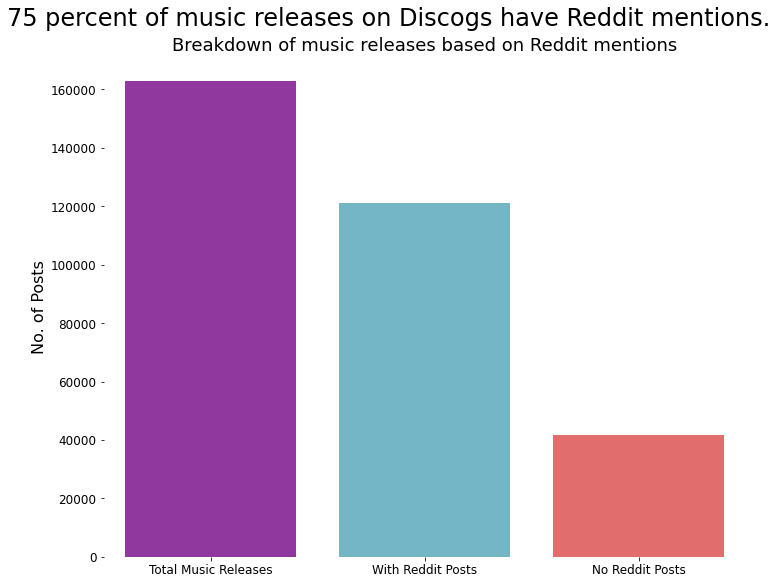

In [4]:
"""
Displays the bar chart for Breakdown of music releases based on
Reddit mentions
"""

sql = """
      SELECT 
          B as 'Total Music Releases', 
          A as 'With Reddit Posts', 
          B-A as 'No Reddit Posts'
          FROM 
              (SELECT COUNT(*) as A FROM exclude_id_fin) as A
              CROSS JOIN 
                  (SELECT DISTINCT COUNT(release_id) as B
        FROM releases) b
      """

df_subj = pd.read_sql_query(sql, conn)

plt.rcParams['figure.dpi'] = 50
fig, ax = plt.subplots(figsize=(10, 8), constrained_layout=True)

sns.barplot(data=df_subj, palette=['#9d27b0', '#66bfd3', '#f55959'], ax=ax)
ax.set_facecolor("white")

ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

df_subj['% with posts'] = (str(round((df_subj.iloc[0][1] /
                                      df_subj.iloc[0][0] * 100), 2))) + '%'
df_subj['% no post'] = (str(round((df_subj.iloc[0][2] /
                                   df_subj.iloc[0][0] * 100), 2))) + '%'

plt.suptitle(
    '75 percent of music releases on Discogs have Reddit mentions.', fontsize=24)
plt.title('Breakdown of music releases based on Reddit mentions', fontsize=18)
plt.ylabel("No. of Posts", fontsize=16)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

for i in df_subj.columns:
    print(f'{i}: {df_subj[i][0]}')

Total Reddit Posts: 707544
Reddit Posts with song mentions: 482171
% of reddit posts with song mentions: 68.15%


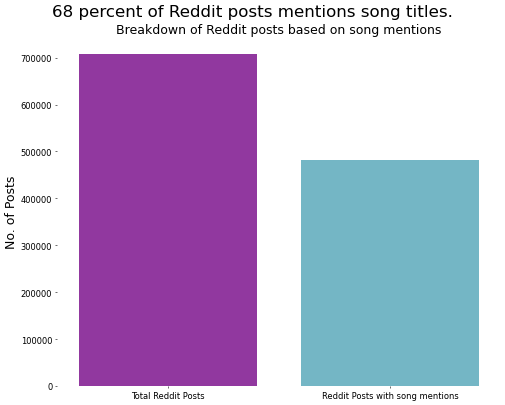

In [5]:
"""
Displays the bar chart of Breakdown of Reddit posts based on song mentions
"""

sql = """
      SELECT 
           B as 'Total Reddit Posts',
           A as 'Reddit Posts with song mentions'
      FROM
          (SELECT COUNT(*) as A FROM reddit_staging) as A
      CROSS JOIN 
          (SELECT COUNT(*) as B FROM reddit_submissions_processed) as B
      """

df_subj = pd.read_sql_query(sql, conn)

plt.rcParams['figure.dpi'] = 50
fig, ax = plt.subplots(figsize=(10, 8), constrained_layout=True)

sns.barplot(data=df_subj, palette=['#9d27b0', '#66bfd3'], ax=ax)
ax.set_facecolor("white")

ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

df_subj['% of reddit posts with song mentions'] = (str(round((df_subj.iloc[0][1] /
                                                              df_subj.iloc[0][0] * 100), 2))) + '%'

plt.suptitle('68 percent of Reddit posts mentions song titles.', fontsize=24)
plt.title('Breakdown of Reddit posts based on song mentions', fontsize=18)

plt.ylabel("No. of Posts", fontsize=18)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

for i in df_subj.columns:
    print(f'{i}: {df_subj[i][0]}')

<font size=3>Number of song releases that have Reddit conversations</font>

In [6]:
"""
Displays the total count in the data frame for Reddit Conversations that
happened prior, during and post song release with complete release date.
"""

sql = """ SELECT COUNT(A) as 'Total Release with Topics Prior'
      FROM (SELECT COUNT(*) as A
            FROM releases_reddit_fin
            WHERE LENGTH(RELEASED) > 4
            AND created_utc < released
            GROUP BY release_id)
      """
df_prior = pd.read_sql_query(sql, conn)
print(f'{df_prior.columns[0]}: {df_prior.loc[0, df_prior.columns[0]]}')

sql = """ SELECT COUNT(A) as 'Total Release with Topics During Release'
      FROM (SELECT COUNT(*) as A
            FROM releases_reddit_fin
            WHERE LENGTH(RELEASED) > 4
            AND created_utc = released
            GROUP BY release_id)
      """
df_during = pd.read_sql_query(sql, conn)
print(f'{df_during.columns[0]}: {df_during.loc[0, df_during.columns[0]]}')


sql = """ SELECT COUNT(A) as 'Total Release with Topics After Release'
      FROM (SELECT COUNT(*) as A
            FROM releases_reddit_fin
            WHERE LENGTH(RELEASED) > 4
            AND created_utc > released
            GROUP BY release_id)
      """
df_after = pd.read_sql_query(sql, conn)
print(f'{df_after.columns[0]}: {df_after.loc[0, df_after.columns[0]]}')

Total Release with Topics Prior: 25326
Total Release with Topics During Release: 4419
Total Release with Topics After Release: 24431


###  Days of the week with the most number of Reddit posts related to Discogs

In [7]:
def get_reddit_date(month, start, end, monthly=True, release_id=0):
    """
    Queries the post count in a given period based on the release month.

    Parameters:
    month: string YYYY-MM
    start: string YYYY-MM-DD
    end: string YYYY-MM-DD
    monthly: true or false if the filter will be based on month or day
    release_id: if not 0 then it will append release_id search

    Returns: If monthly is True, returns DataFrame grouped
                by monthly from SQL dataset

             Else, returns DataFrame grouped by day from SQL dataset

    """
    if monthly is True:
        sql = """
              SELECT 
                  strftime('%m',created_utc) AS months,
                  count(created_utc) as post_count
              FROM 
                  releases_reddit_fin
              WHERE
                  created_utc BETWEEN '""" + start + """' AND '""" + end + \
            """' AND substring(released, 1, 7) = '""" + month + "' "

        if release_id > 0:
            sql = sql + " AND release_id = " + str(release_id)

        sql = sql + " GROUP BY months"

    else:
        sql = """
              SELECT 
                  created_utc,
                  count(created_utc) as post_count
              FROM 
                  releases_reddit_fin
              WHERE
                  created_utc BETWEEN '""" + start + """' AND '""" + end + \
            """' AND substring(released, 1, 10) = '""" + month + "' "

        if release_id > 0:
            sql = sql + " AND release_id = " + str(release_id)

        sql = sql + " GROUP BY created_utc"

    df = pd.read_sql_query(sql, conn)
    return df

The graph below displays the daily number of Reddit posts on music subreddits.

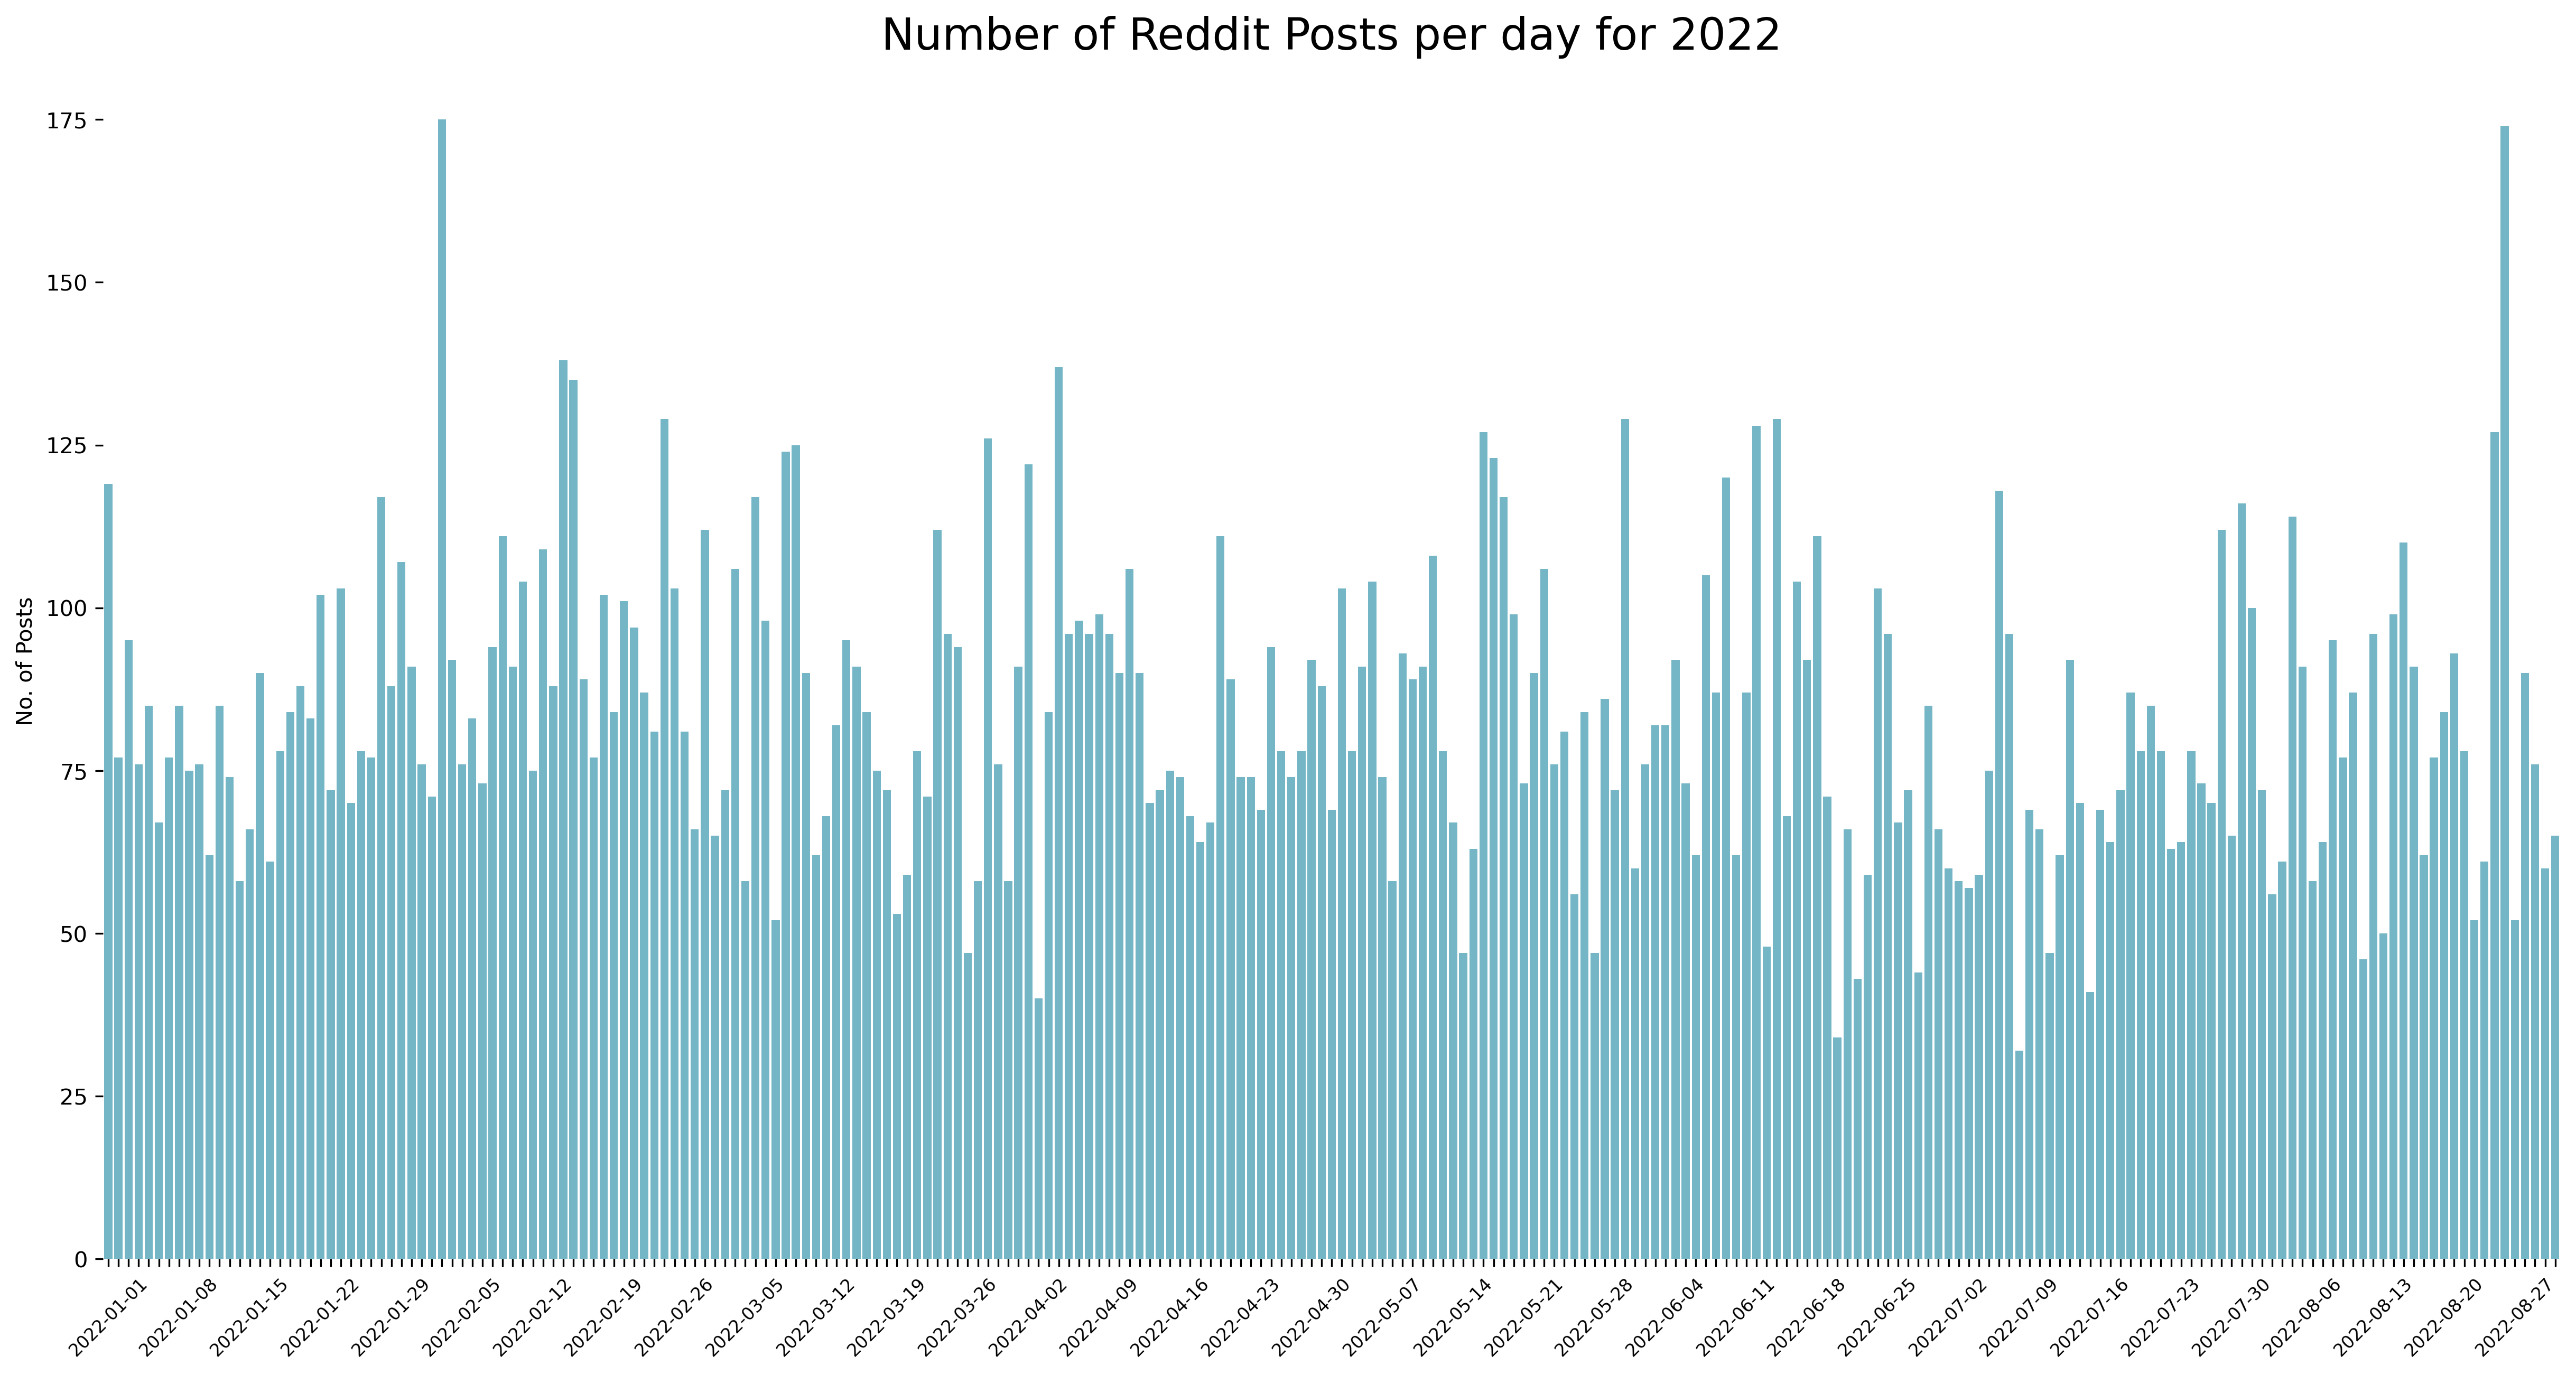

In [8]:
"""
Calls get_reddit_date and resulting dataframe will be displayed in the bar
chart for Number of Reddit Posts per day for 2022
"""

df_daily_2022 = get_reddit_date(
    '2022-01-01', '2022-01-01', '2022-08-31', monthly=False)

dx = df_daily_2022["created_utc"].tolist()

days = []
for i in dx:
    date = pd.Timestamp(i)
    days.append(date.day_name())

df_daily_2022['days'] = days

df_daily_2022.sort_values("post_count", ascending=False)

plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['lines.linewidth'] = 3

ax = sns.barplot(data=df_daily_2022, x='created_utc',
                 y='post_count', color='#66bfd3')
ax.set_facecolor('white')
ax.grid(False)

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

for i, label in enumerate(ax.xaxis.get_ticklabels()):
    if i % 7 != 0:
        label.set_visible(False)

plt.xticks(rotation=45, fontsize=8)

plt.xlabel("")
plt.ylabel("No. of Posts")
plt.title("Number of Reddit Posts per day for 2022", fontsize=20)
plt.show()

Data suggests that the **busiest day for Reddit posts is Friday**. This may be because it's also the day for music releases. Or it could be that more people are active on Reddit during Fridays (towards the weekend). Monday records the lowest number of music-related Reddit posts.

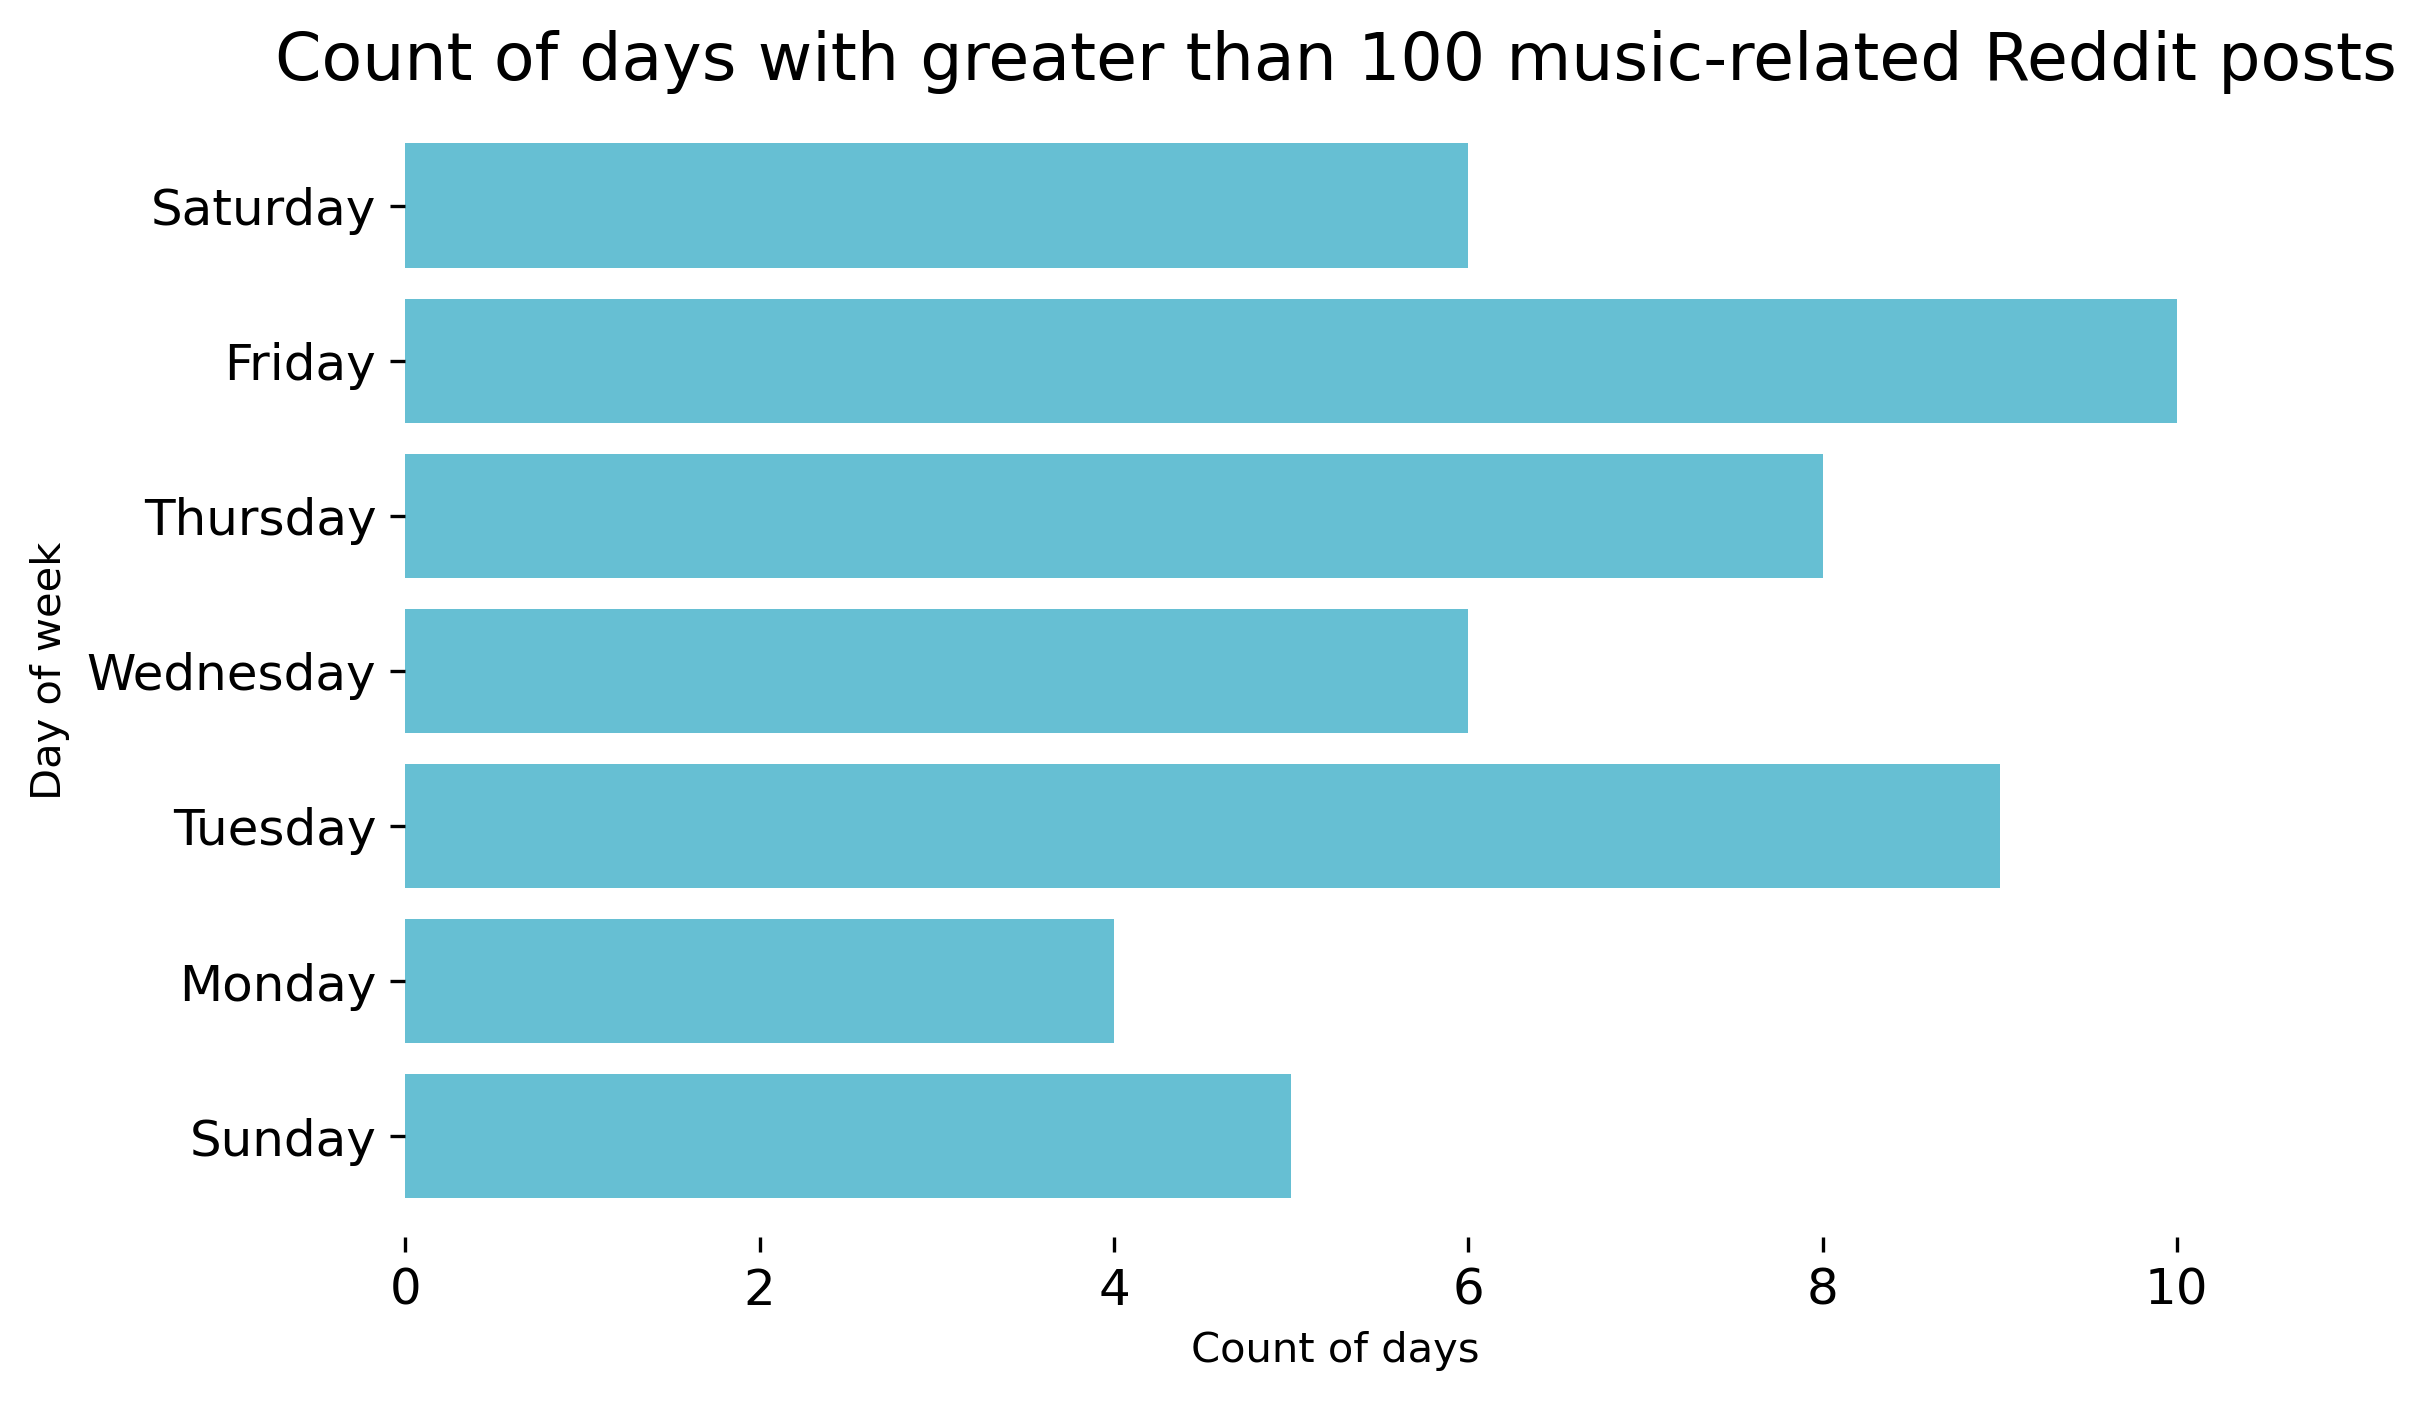

In [9]:
"""
Calls get_reddit_date and resulting dataframe will be displayed in the bar
chart for Count of days with greater than 100 music-related Reddit posts.
"""

dx = df_daily_2022["created_utc"].tolist()

days = []
for i in dx:
    date = pd.Timestamp(i)
    days.append(date.day_name())

df_daily_2022['days'] = days
dfcounts_2022_highest = (df_daily_2022.query('200 >= post_count > 100')
                         .sort_values("post_count", ascending=False))
dfcounts_2022_lowest = (df_daily_2022.query('0 <= post_count < 70')
                        .sort_values("post_count"))

df_high_to_plot = dfcounts_2022_highest['days'].value_counts()


sort = {'Monday': 1, 'Sunday': 0, 'Tuesday': 2, 'Wednesday': 3,
        'Thursday': 4, 'Friday': 5, 'Saturday': 6}

sort_l = [5, 2, 4, 3, 6, 0, 1]

df_high_to_plot = df_high_to_plot.set_axis(sort_l)
df_high_to_plot = df_high_to_plot.sort_index()

plt.rcParams["figure.figsize"] = (8, 5)

ax = df_high_to_plot.plot(kind='barh', width=0.8, color='#66bfd3')

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.grid(False)

ax.set_xlabel("Count of days")
ax.set_ylabel("Day of week")
ax.set_yticklabels(["Sunday", "Monday", "Tuesday", "Wednesday",
                   "Thursday", "Friday", "Saturday"])

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.title(
    "Count of days with greater than 100 music-related Reddit posts", fontsize=16)

plt.show()

### Month in focus: Reddit conversations for April  song releases

There are 4,491 song releases for the month of April 2022. All posts related to April song releases from Jan 01, 2022 to Aug 31, 2022 totals to 387,623 posts. Peak of Reddit posts happened in March, around a month before the April releases. Highest volume in March is around 52.5k posts and it started to decline May onwards.

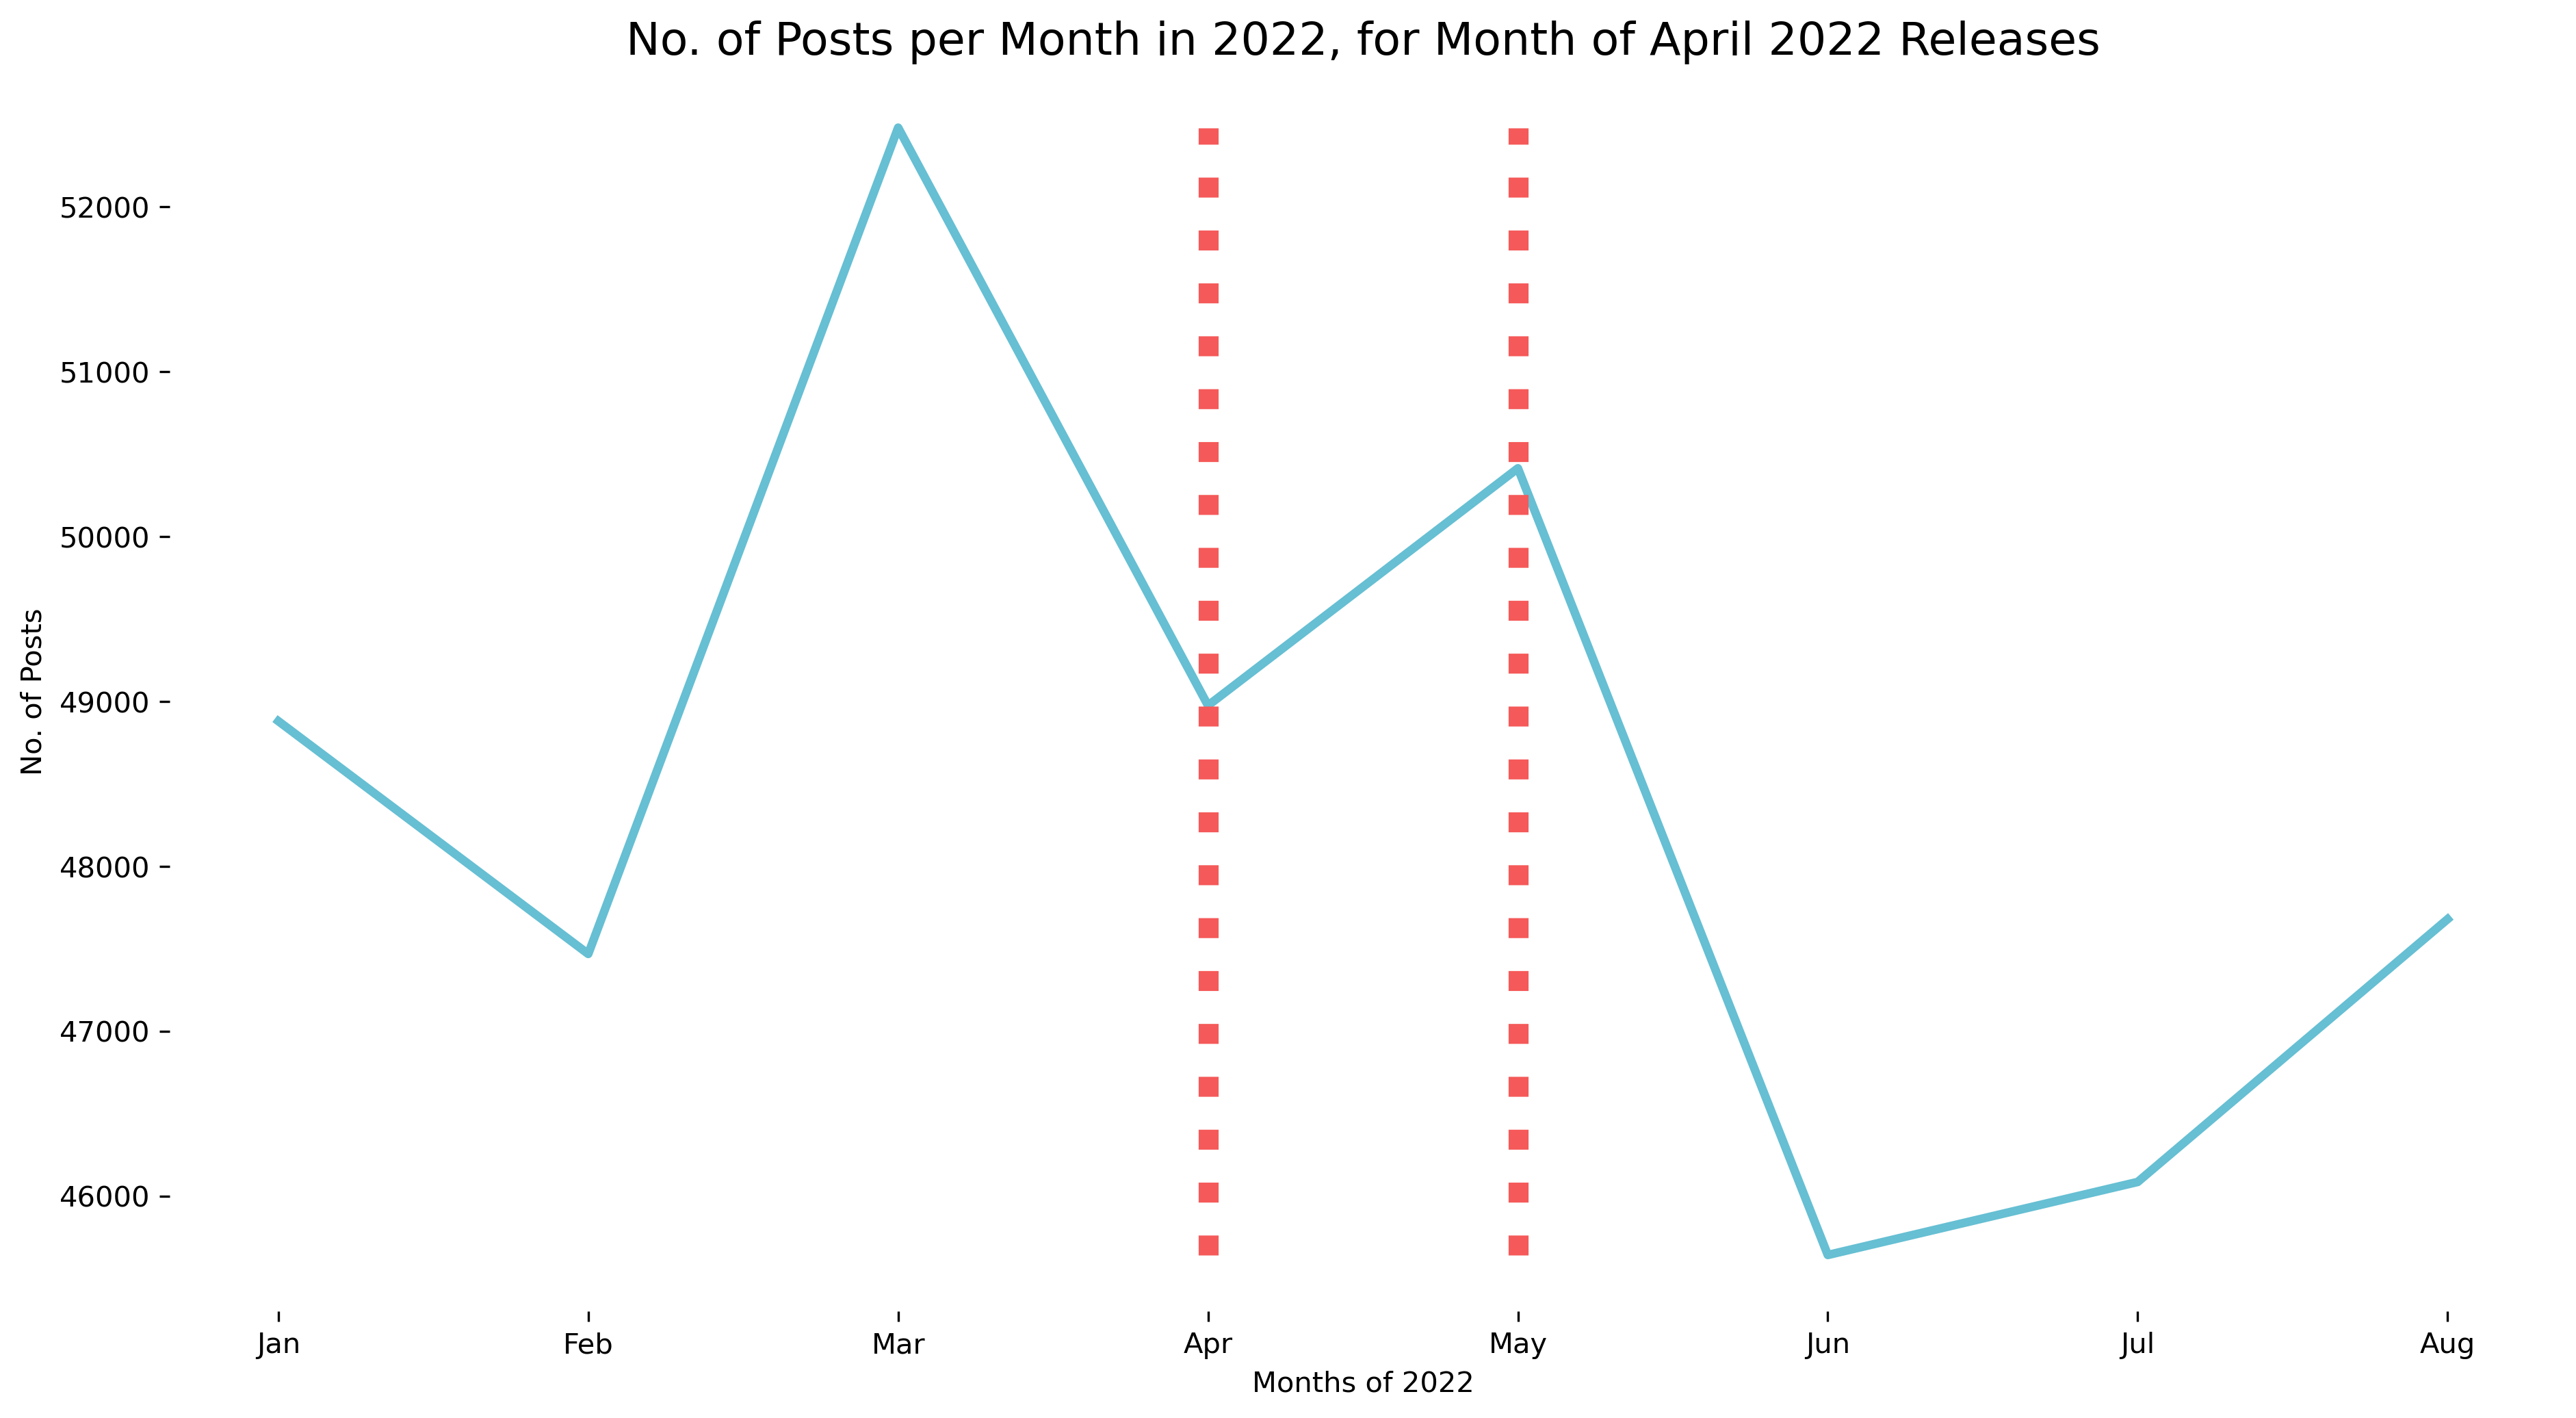

In [10]:
"""
Calls get_reddit_date and resulting dataframe will be displayed in the bar
chart for No. of Posts per Month in 2022, for Month of April 2022 Releases
"""

df_monthly_2022 = get_reddit_date('2022-04', '2022-01-01', '2022-08-31')

pd.set_option('display.max_columns', 100)

plt.rcParams["figure.figsize"] = (15, 8)
plt.rcParams['lines.linewidth'] = 3

ax = sns.lineplot(data=df_monthly_2022, x='months', y='post_count',
                  err_style="bars", color='#66bfd3')

ax.set_facecolor('white')
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
mode_idx = y.argmax()

ax.vlines(['04'], min(y), y[mode_idx], color='#f55959', ls=':', linewidth=7)
ax.vlines(['05'], min(y), y[mode_idx], color='#f55959', ls=':', linewidth=7)

ax.set_xticks(['01','02','03','04','05','06','07','08'])
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'])

plt.xlabel("Months of 2022")
plt.ylabel("No. of Posts")

plt.title(
    "No. of Posts per Month in 2022, for Month of April 2022 Releases", fontsize=16)

plt.show()

###  Looking closely to daily trends for a single release date,

There are 28 song releases in May 15, 2022. From looking at daily trends of related Reddit posts, it is apparent that peak happens a day or two before and after the song release date.

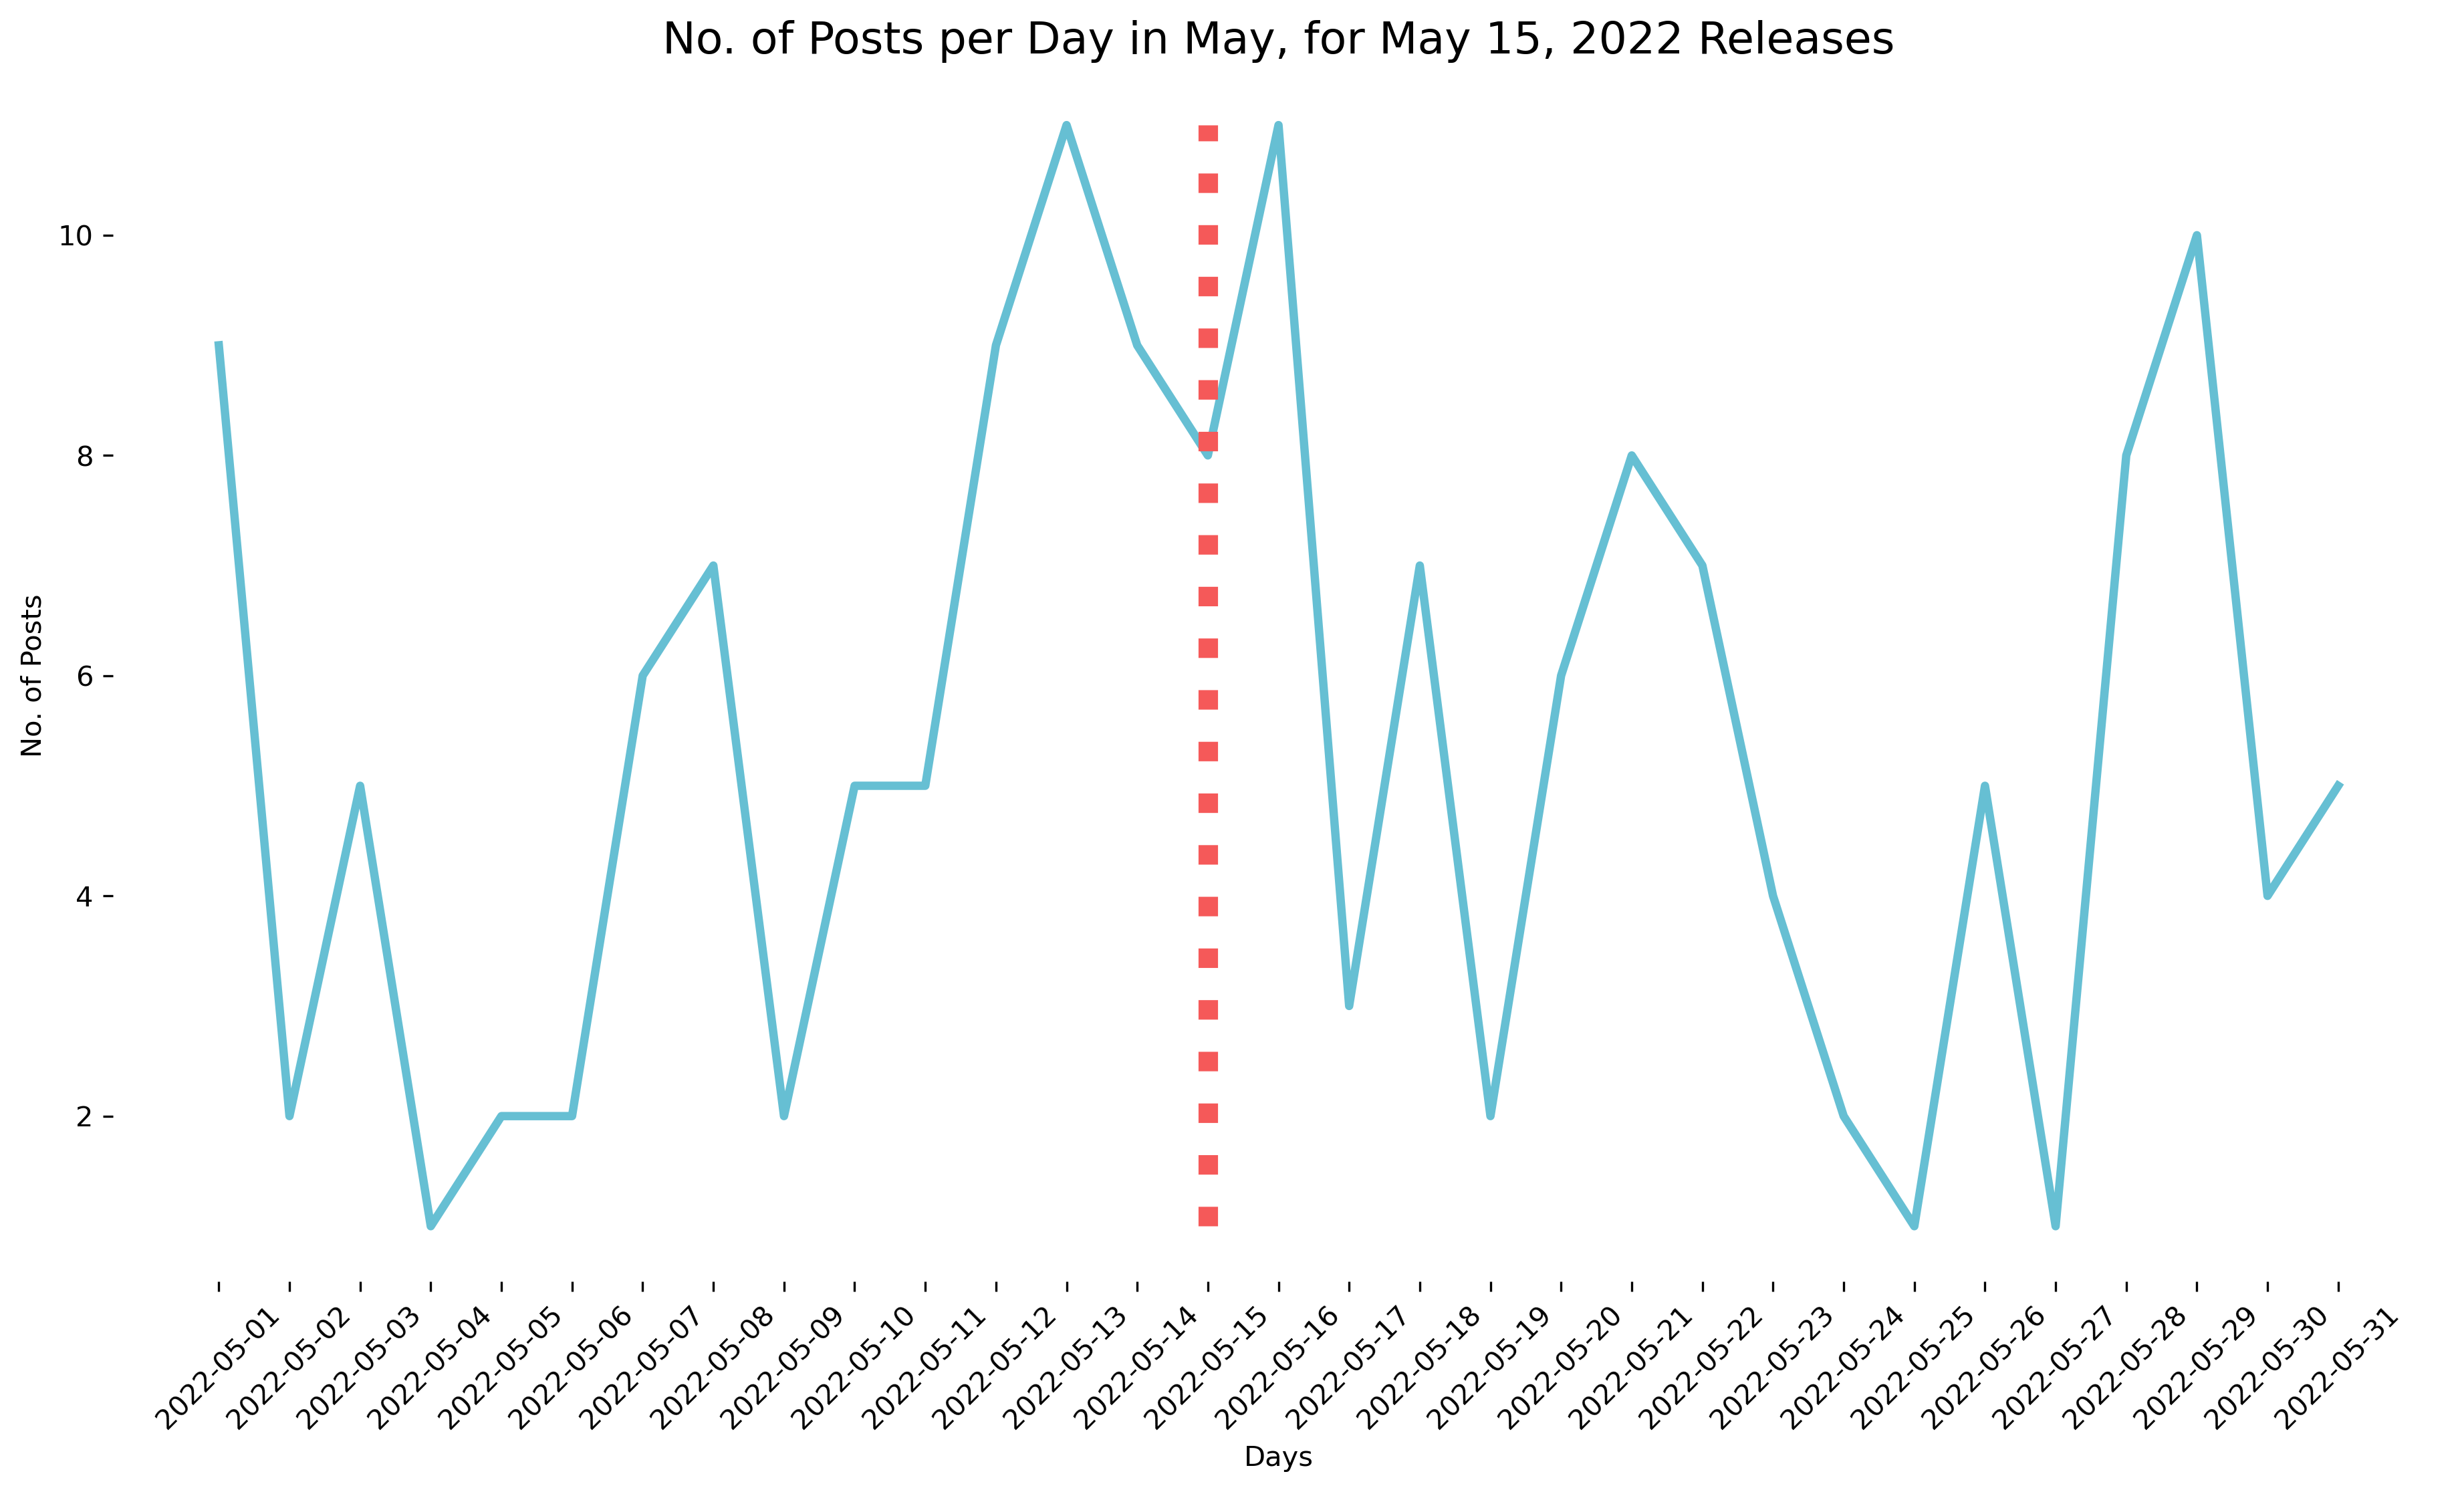

In [11]:
"""
Calls get_reddit_date and resulting dataframe will be displayed in the bar
chart for No. of Posts per Day in May, for May 15, 2022 Releases
"""

df_day = get_reddit_date('2022-05-15', '2022-05-01',
                         '2022-05-31', monthly=False)

plt.rcParams["figure.figsize"] = (15, 8)
plt.rcParams['lines.linewidth'] = 3
ax = sns.lineplot(data=df_day, x='created_utc', y='post_count',
                  err_style="bars", color='#66bfd3')

ax.set_facecolor('white')
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()

mode_idx = y.argmax()
ax.vlines(['2022-05-15'], min(y), y[mode_idx],
          color='#f55959', ls=':', linewidth=7)

plt.xlabel("Days")
plt.ylabel("No. of Posts")
plt.title("No. of Posts per Day in May, for May 15, 2022 Releases", fontsize=16)
plt.xticks(rotation=45)
plt.show()

###  Trends for a specific song: Running Up That Hill

Some releases like Running Up That Hill, released in April 2022, does not get trend prior or even during its release. Song was picked up as a topic of Reddit conversations a few months later. We can actually run a release by release report if needed, and we can see most value in this type of report.

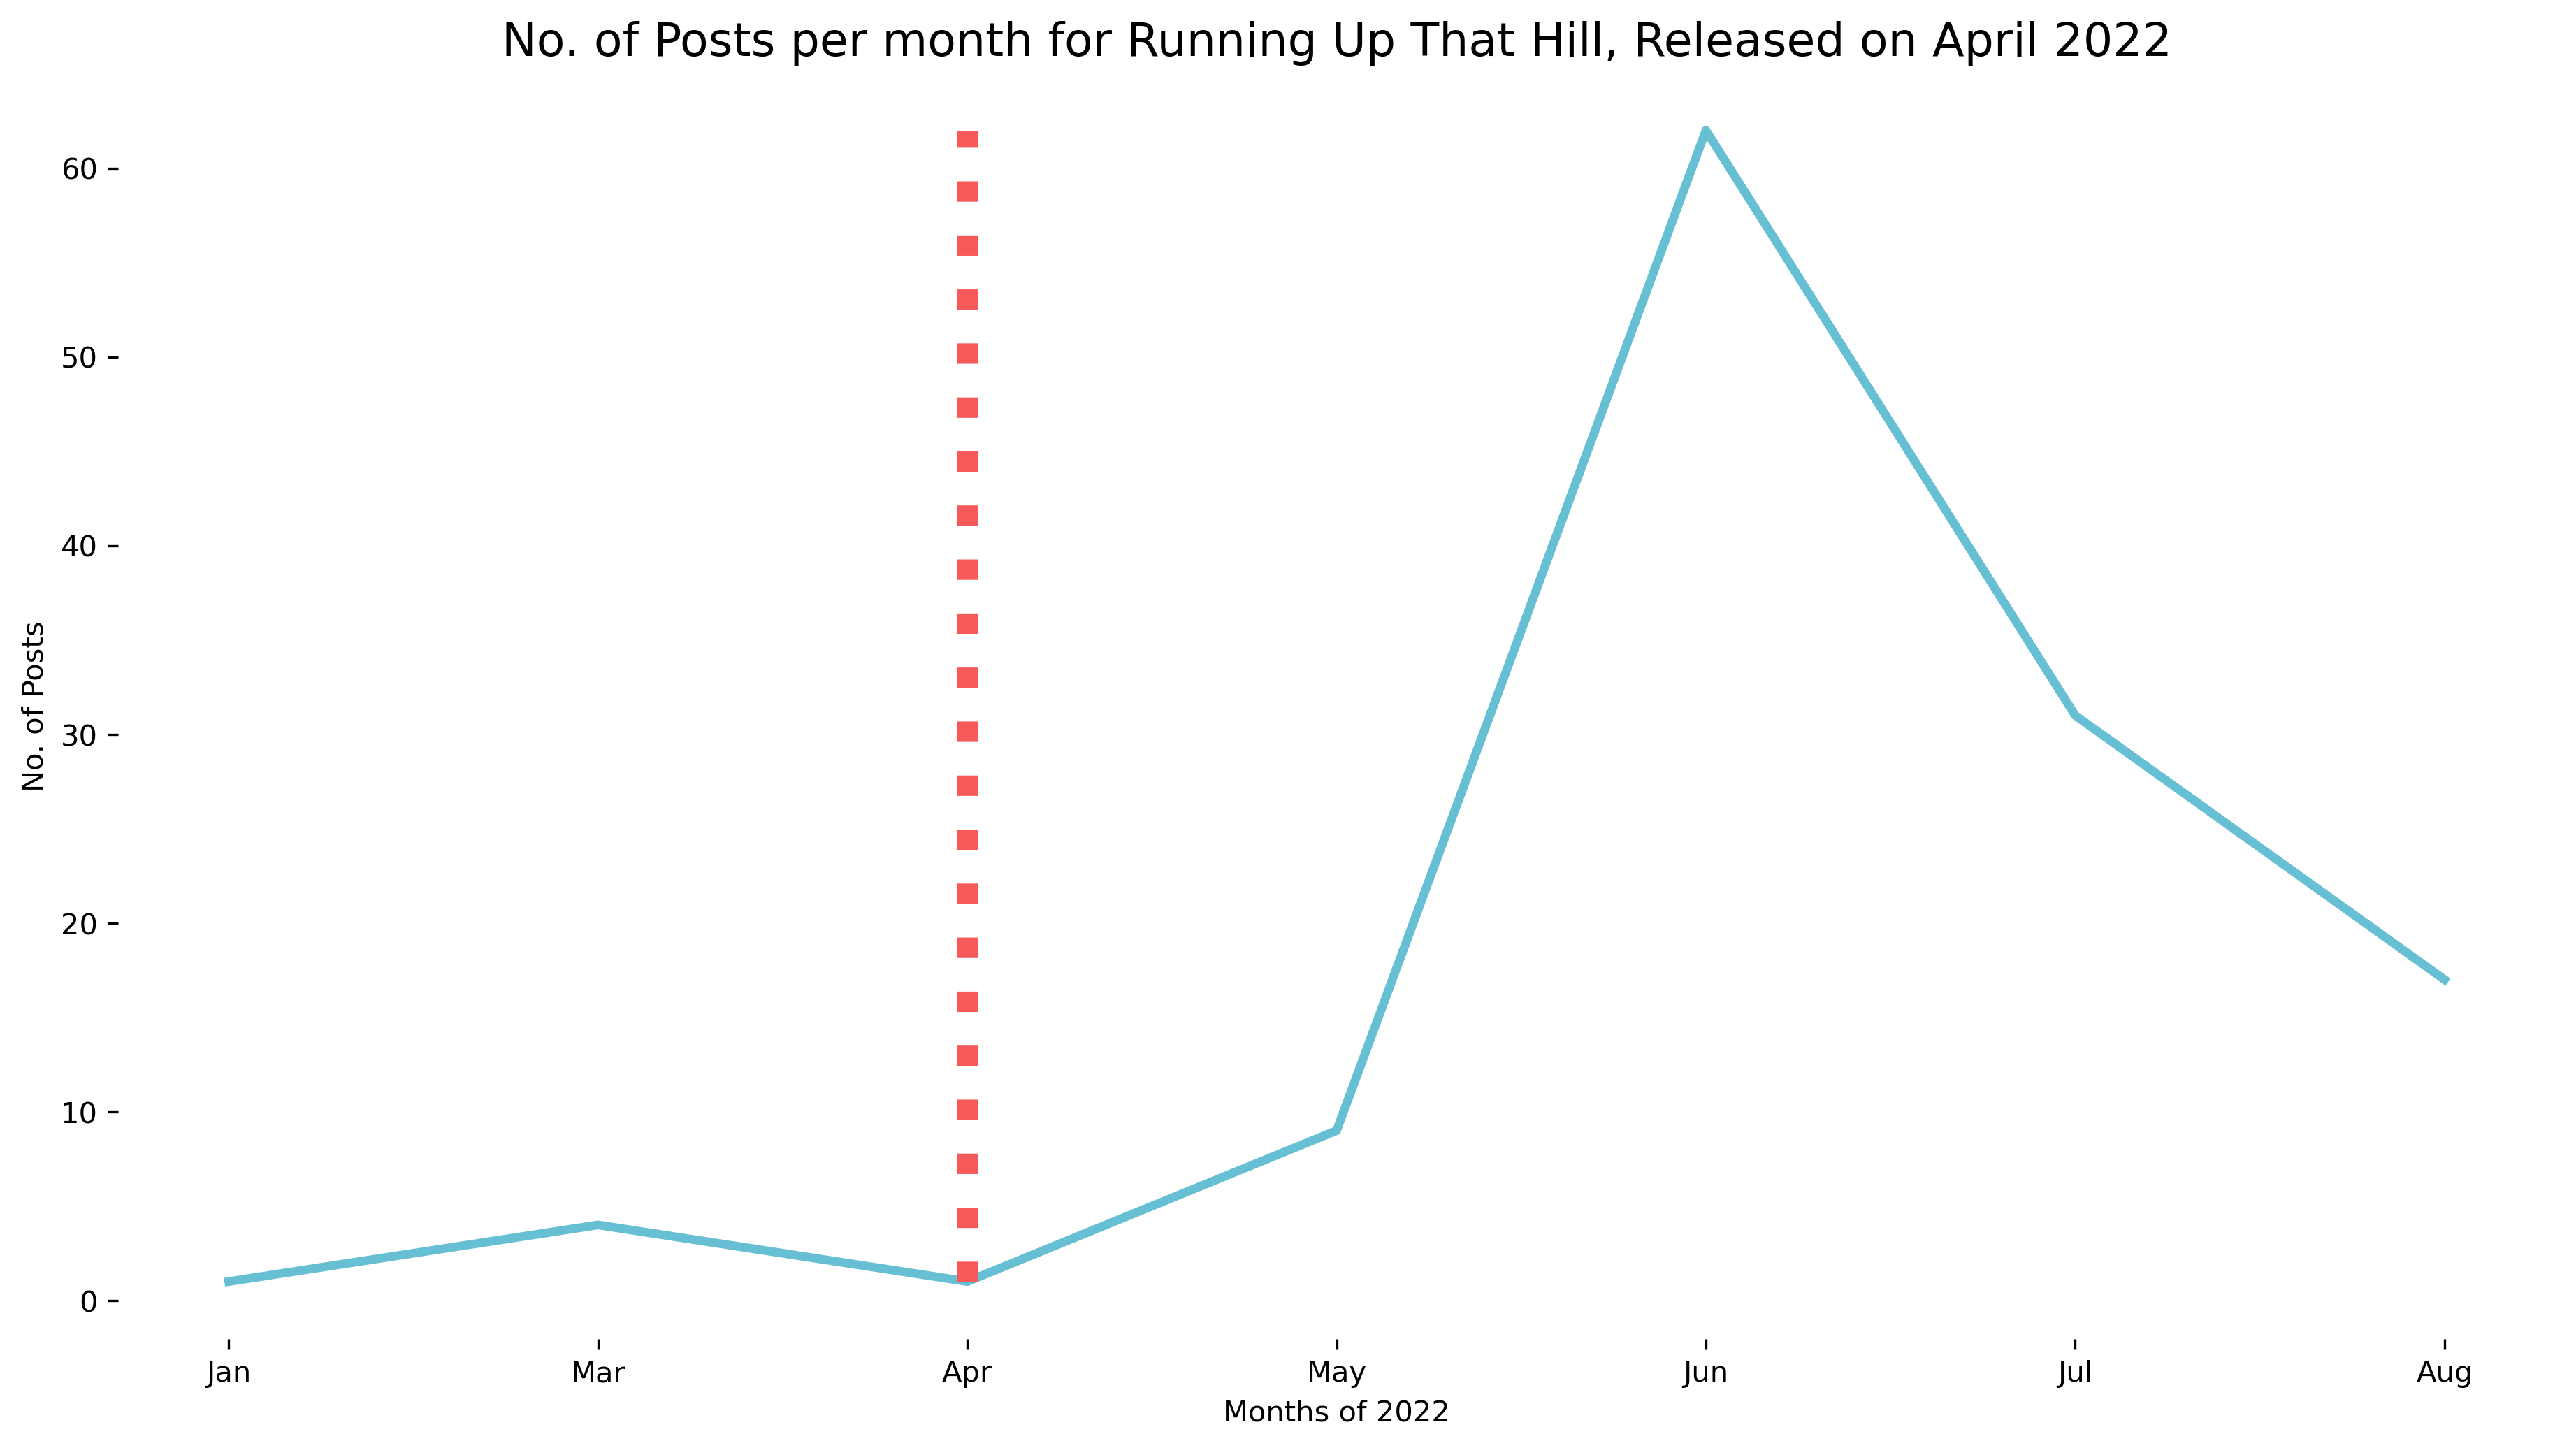

In [12]:
"""
Calls get_reddit_date and resulting dataframe will be displayed in the bar
chart No. of Posts per Month for Running Up That Hill, Released on April 2022
"""

df_solo = get_reddit_date('2022-04', '2022-01-01', '2022-08-31',
                          monthly=True, release_id=23058686)

plt.rcParams["figure.figsize"] = (15, 8)
plt.rcParams['lines.linewidth'] = 3

ax = sns.lineplot(data=df_solo, x='months', y='post_count',
                  err_style="bars", color='#66bfd3')

ax.set_facecolor('white')
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
mode_idx = y.argmax()

ax.vlines(['04'], min(y), y[mode_idx], color='#f55959', ls=':', linewidth=7)

ax.set_xticks(['01','03','04','05','06','07','08'])
ax.set_xticklabels(['Jan','Mar','Apr','May','Jun','Jul','Aug'])

plt.xlabel("Months of 2022")
plt.ylabel("No. of Posts")
plt.title(
    "No. of Posts per month for Running Up That Hill, Released on April 2022", fontsize=16)

plt.show()

### Analyzing conversation trends per artist

In [13]:
"""
Queries the releases and artists data set with defined filters
"""

discog = pd.read_sql('''
    SELECT artist_id, releases.release_id, name, releases.title, released
    FROM artists
    JOIN releases
    ON releases.release_id = artists.release_id
    WHERE flag == 0
    AND LENGTH(released) == 10
    AND SUBSTR(released, 9, 2) <> '00'
    AND name <> 'Various'
    AND name <> 'Unknown Artist'
    ''', conn).drop_duplicates(['artist_id', 'release_id'])
discog['released'] = pd.to_datetime(discog['released'], format='%Y-%m-%d')
discog = discog[discog['released'] < pd.Timestamp('2022-09-01')]
release1000 = discog.groupby('name').size().sort_values(
    ascending=False)[:1000].index.tolist()
discog1000 = discog[discog['name'].isin(release1000)]
reddit = pd.read_sql('''
    SELECT subject, body, created_utc AS posted
    FROM reddit_staging
    WHERE subject <> 'deleted by user'
    AND body <> 'removed|deleted'
    ''', conn).drop_duplicates()
reddit['posted'] = pd.to_datetime(reddit['posted'], format='%Y-%m-%d')


def get_graph(name):
    '''Returns a graph of releases and reddit posts related to an artist

    Parameters
    ----------
    name: str
        Name of the artist

    Returns
    -------
    ax: seaborn plot
        Line plot of the number of reddit posts that contain the
        name of the artist in the subject per day with vertical orange
        lines to denote release dates
    '''
    discog_date = (discog[discog['name'] == name]['released']
                   .sort_values().unique())
    discog_date = [i for i in discog_date.astype(str)]
    reddit_date = reddit[reddit['subject'].str.contains(re.escape(name))]
    reddit_date = reddit_date.groupby(pd.Grouper(key='posted',
                                                 freq='D')).size()
    sns.set(rc={'figure.figsize': (16, 4)})
    ax = sns.lineplot(data=reddit_date, color='#66bfd3')
    ax.set_facecolor('white')
    ax.grid(False)
    ax.vlines(x=discog_date, ymin=0, ymax=ax.get_ylim()[1],
              color='#f0c35a', label='releases', linestyle='--')
    ax.set_title(name, fontsize=16)
    ax.set_xlabel('date')
    ax.set_ylabel('number of Reddit posts')
    ax.legend()
    plt.show()


def get_counts(name, tol=0, thres=1):
    '''Returns a pandas Series with dates of peaks and corresponding
    number of posts

    Parameters
    ----------
    name: str
        Name of the artist
    tol: int
        Tolerance of the alignment in days
    thres: int
        Minimum number of posts needed to be considered a peak

    Returns
    -------
    A pandas Series where the indices are dates that are counted as peaks
    and the values are the number of posts in a peak
    '''
    discog_date = (discog[discog['name'] == name]['released']
                   .sort_values().unique())
    reddit_date = reddit[reddit['subject']
                         .str.contains(re.escape(name))]
    if reddit_date.size == 0 or discog_date.size == 0:
        return None
    reddit_date = (reddit_date.groupby(pd.Grouper(key='posted', freq='D'))
                   .size().reset_index(name='posts'))
    dates = {}
    for date in discog_date:
        dates[date] = reddit_date[(reddit_date['posted'] >= date
                                   - np.timedelta64(tol, 'D')) &
                                  (reddit_date['posted'] <= date
                                   + np.timedelta64(tol, 'D'))
                                  ]['posts'].sum()
    return pd.Series(dates)


def get_score(name, tol=0, thres=1):
    '''Returns the percentage of the total number of releases
    that aligned with a Reddit post peak

    Parameters
    ----------
    name: str
        Name of the artist
    tol: int
        Tolerance of the alignment in days
    thres: int
        Minimum number of posts needed to be considered a peak

    Returns
    -------
    score: float
        Percentage of the total number of releases that aligned
        with a Reddit post peak
    '''
    srs = get_counts(name, tol, thres)
    if srs is None:
        return None
    else:
        return sum(srs >= thres) / srs.size


def get_scores(tol=0, thres=1):
    '''Returns the scores of the top 1000 artists based on the number
    of releases

    Parameters
    ----------
    tol: int
        Tolerance of the alignment in days
    thres: int
        Minimum number of posts needed to be considered a peak

    Returns
    -------
    Pandas DataFrame containing artist names and corresponding scores
    '''
    names = []
    scores = []
    for name in tqdm(discog1000['name'].unique()):
        score = get_score(name, tol, thres)
        if score is None:
            continue
        else:
            names.append(name)
            scores.append(score)
    return pd.DataFrame({'name': names, 'score': scores})


def get_stats(score_df):
    '''Returns the statistics of the scores of the top 1000 artists based
    on the number of releases

    Parameters
    ----------
    score_df: pandas DataFrame
        Pandas DataFrame containing artist names and corresponding scores

    Returns
    -------
    The number of artists with no matches, the number of artists with zero
    score, the mean score, the standard deviation of the scores, and the 
    histogram of the scores.
    '''
    print('Zero tolerance applied:')
    print(f'Number of artists with no matches: {1000 - score_df.shape[0]}')
    print(f'Number of artists with zero score: '
          f'{score_df[score_df["score"] == 0].shape[0]}')
    print(f'Mean score: {score_df["score"].mean():.3f}')
    print(f'Std. dev. score: {score_df["score"].std():.3f}')
    sns.set(rc={'figure.figsize': (8, 6)})
    ax = sns.histplot(data=score_df)
    ax.set_facecolor('white')
    ax.grid(False)
    plt.title('Count of post-generating scores', fontsize=16)
    plt.xlabel('post-generating score')
    plt.ylabel('count')
    plt.legend('')
    plt.show()


def get_wordcloud(name, date_range, rel=True):
    '''Returns a word cloud from posts in a certain range of dates with
    subjects that contain the artist name 

    Parameters
    ----------
    name: str
        Name of the artist
    date_range: list
        List of dates of format [start_date, end_date]

    Returns
    -------
    A word cloud from posts in a certain range of dates with subjects
    that contain the artist name 
    '''
    release = reddit[reddit['subject'].str.contains(re.escape(name))
                     & reddit['posted'].isin(pd.date_range(*date_range))]
    print(f'Number of posts: {release.shape[0]}')
    words = ' '.join(release['subject'])
    wordcloud = WordCloud(background_color="white", max_words=500,
                          width=1024, height=720)
    wordcloud.generate(words)
    plt.figure(figsize=(10, 8))
    if rel:
        plt.title(f'Posts about {name} during a song release', fontsize=16)
    else:
        plt.title(f'Posts about {name} without a song release', fontsize=16)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In this part of the analysis, we look at the alignment of Reddit posts with releases, that is, we look at whether the number of Reddit posts related to an artist peak during the dates of releases from the artist. For the sake of reducing computing time, we only considered the top 1000 artists with the most number of releases. The figure below shows graphs for three such artists: Katy Perry, Ed Sheeran, and Taylor Swift. Each graph depicts a release date as an orange line and the number of Reddit posts that contain the name of the artist as a blue line graph. For now, we define a peak as a date with a non-zero number of Reddit posts that contains the name of the artist, but later we will adjust the peak threshold, that is, the number of posts required to be considered a peak. As seen from the graphs, these three artists release new material very frequently. Hence the concept of pre-release and post-release trends no longer holds for these artists. We only focus on whether releases immediately generate posts. We see from the graphs that this is not always the case.

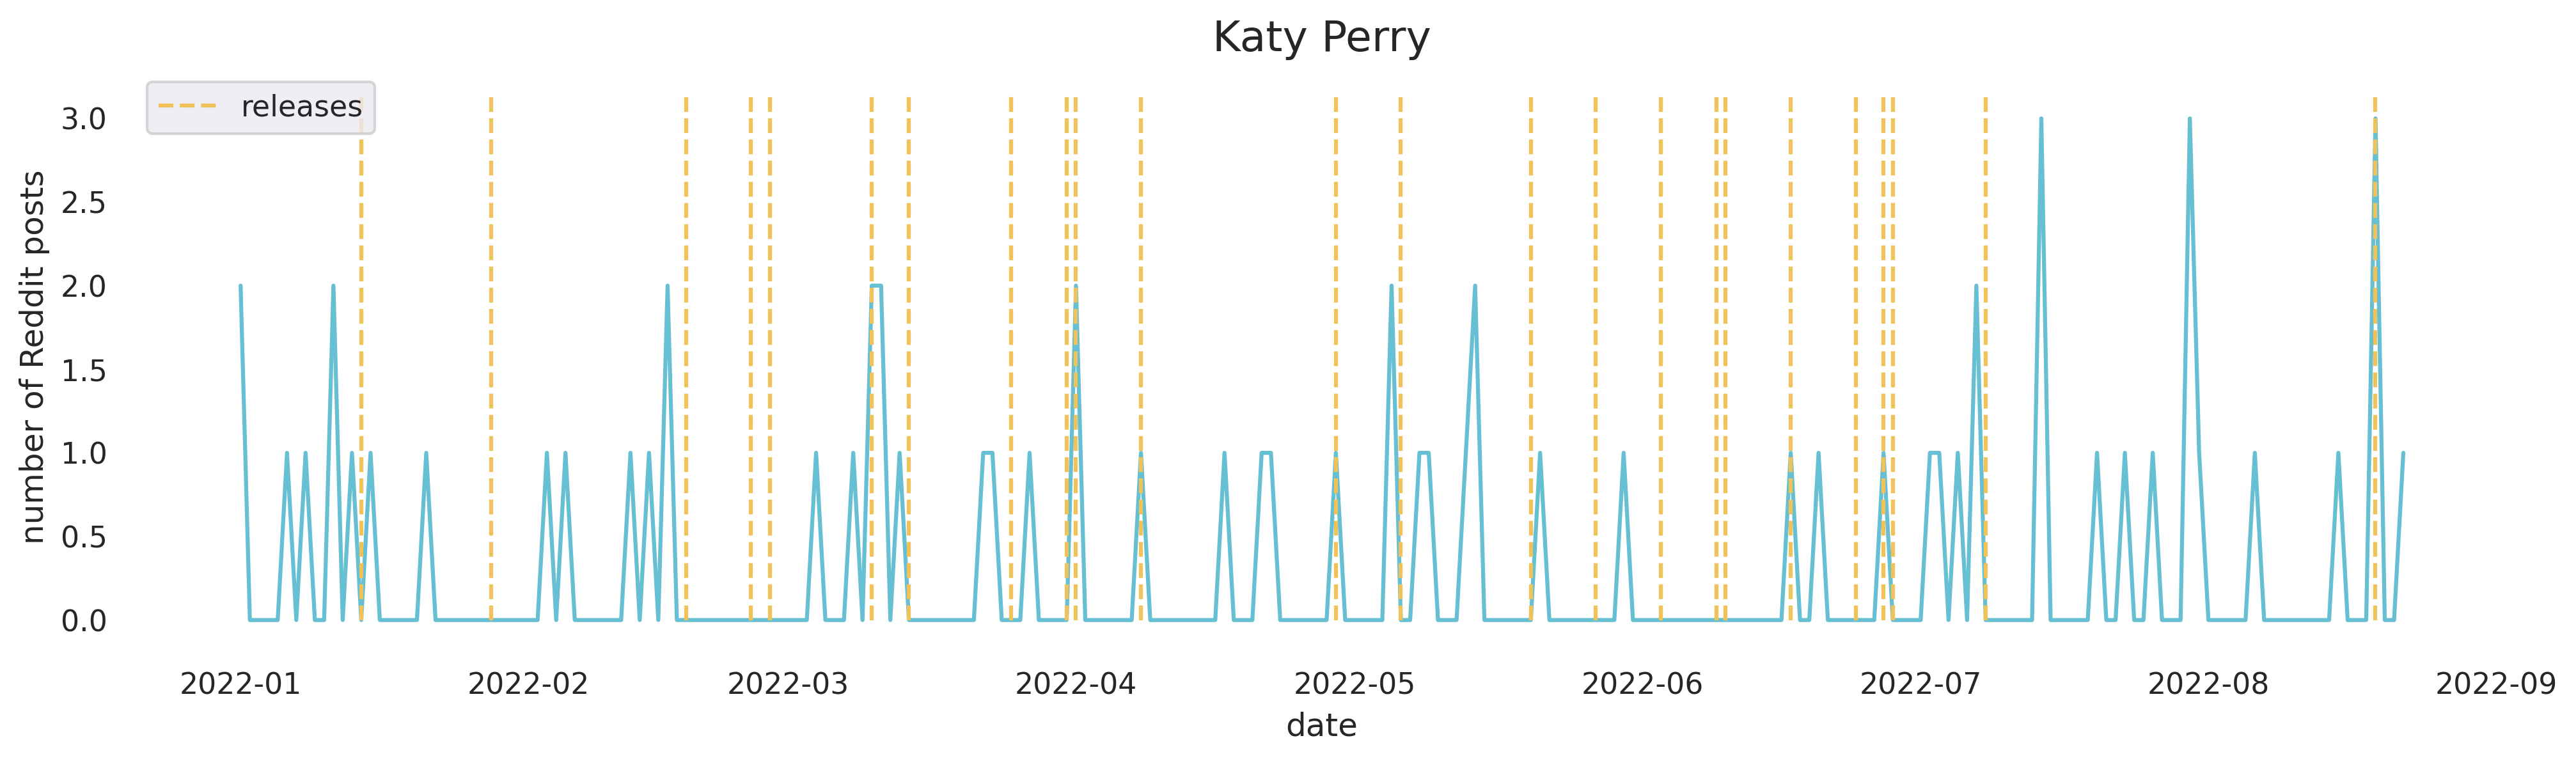

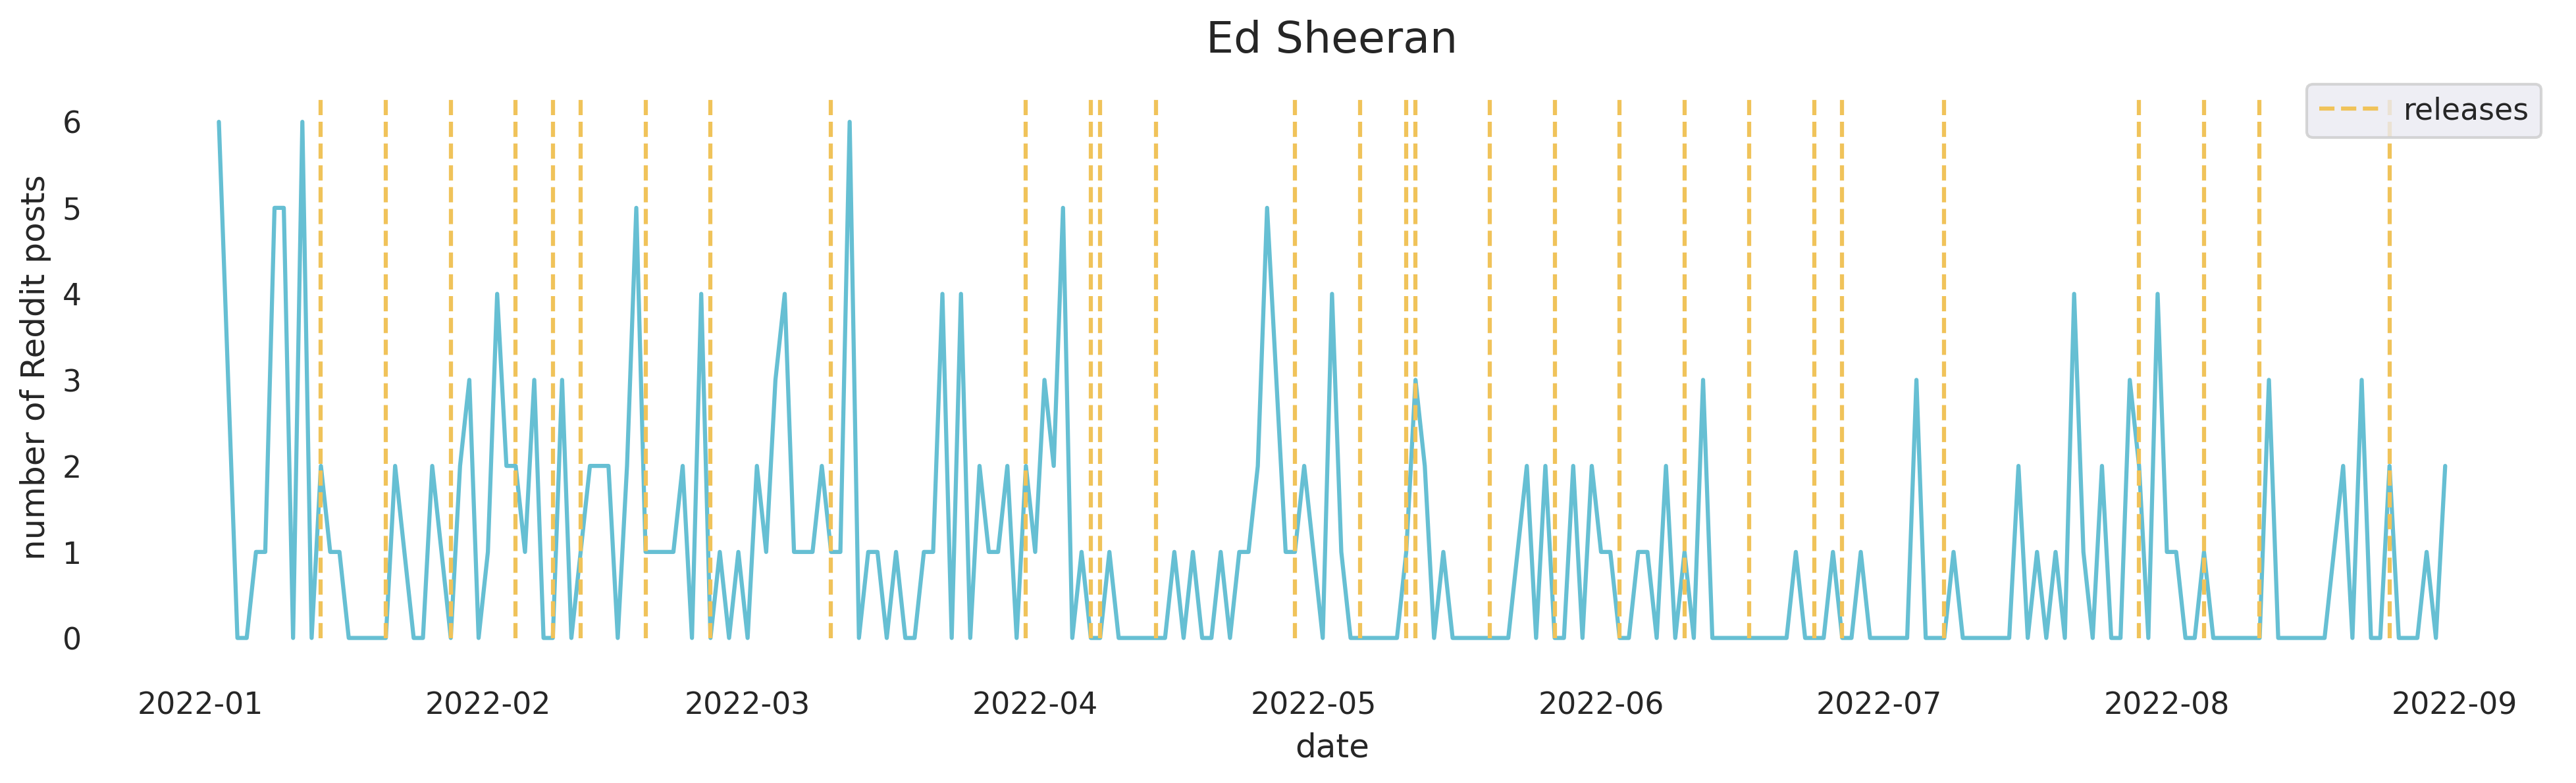

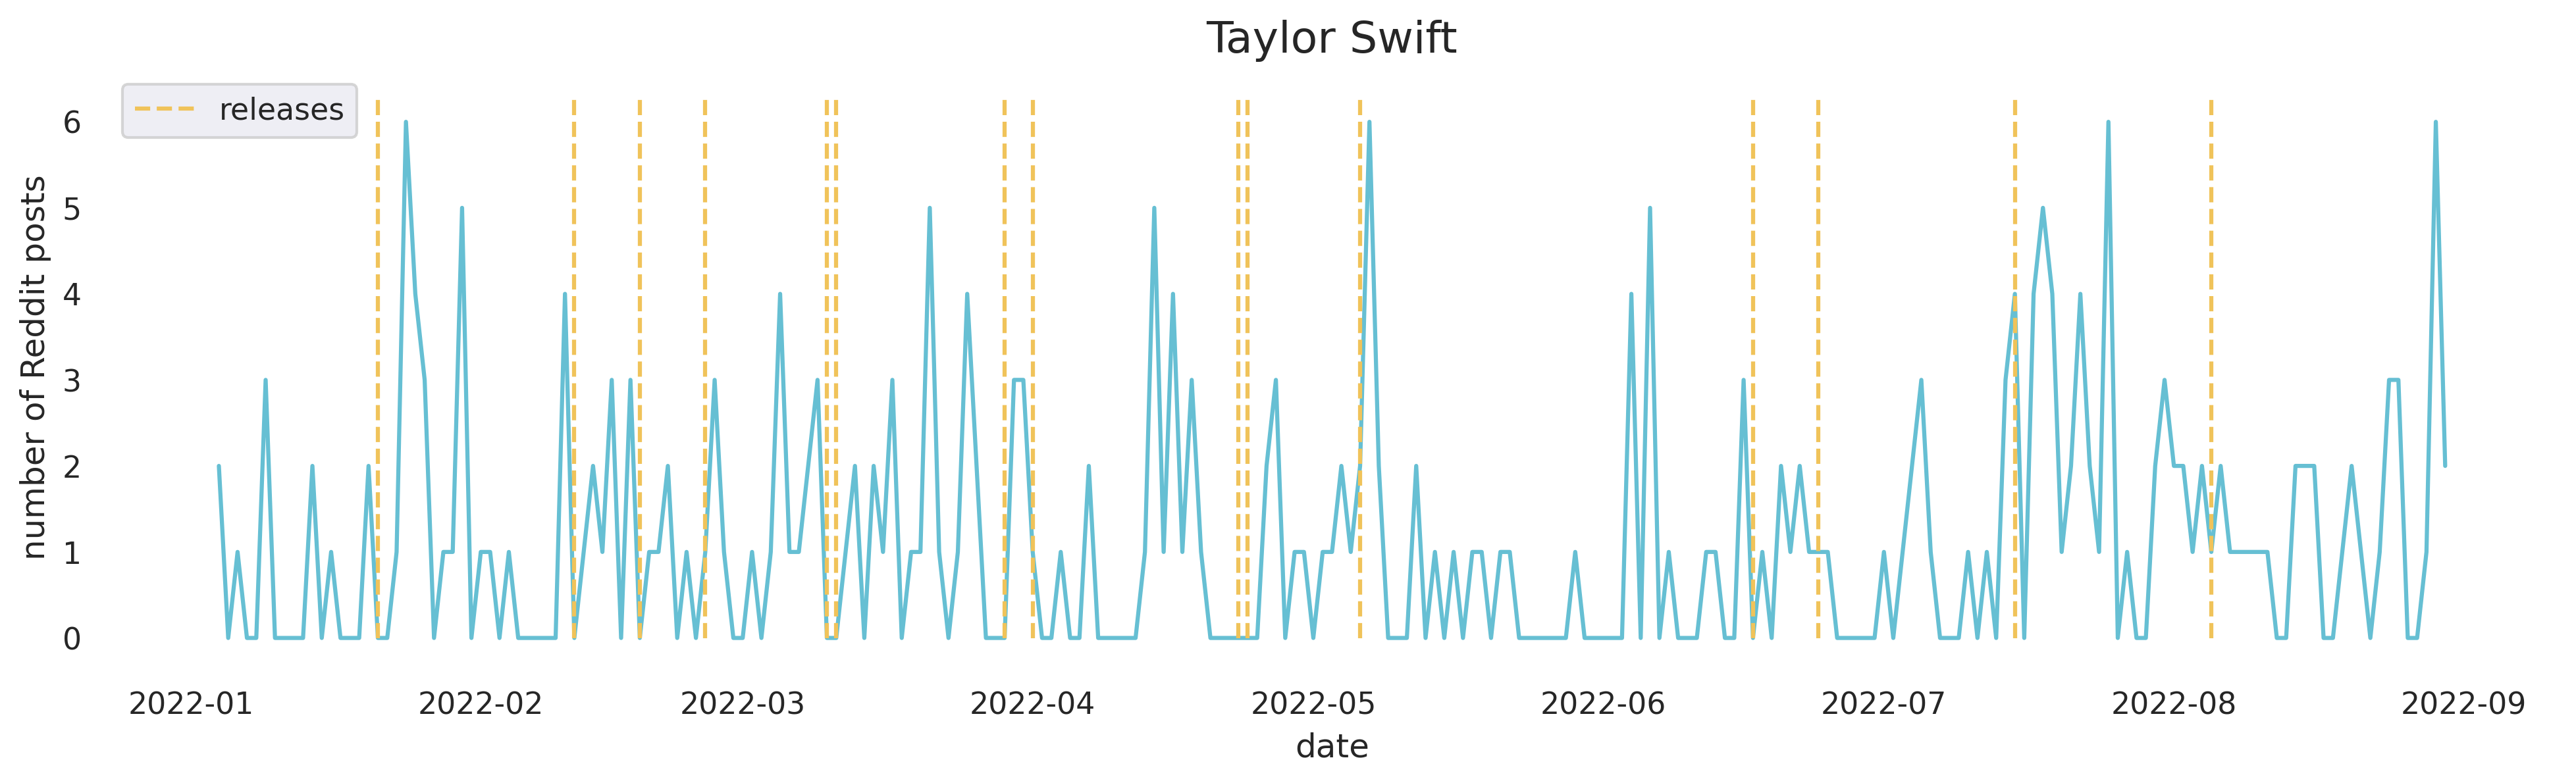

In [14]:
for artist in ['Katy Perry', 'Ed Sheeran', 'Taylor Swift']:
    get_graph(artist)

The word clouds below are from Reddit posts about Taylor Swift for two three-day spans: one which coincides with a release and another that does not coincide with a release. Note that the span that coincides with a release had more repeating words compared to the span that does not coincide with a release, even though it had less number of posts. This could imply that posts from the former were more focused on a common topic compared to that of the latter.

Number of posts: 10


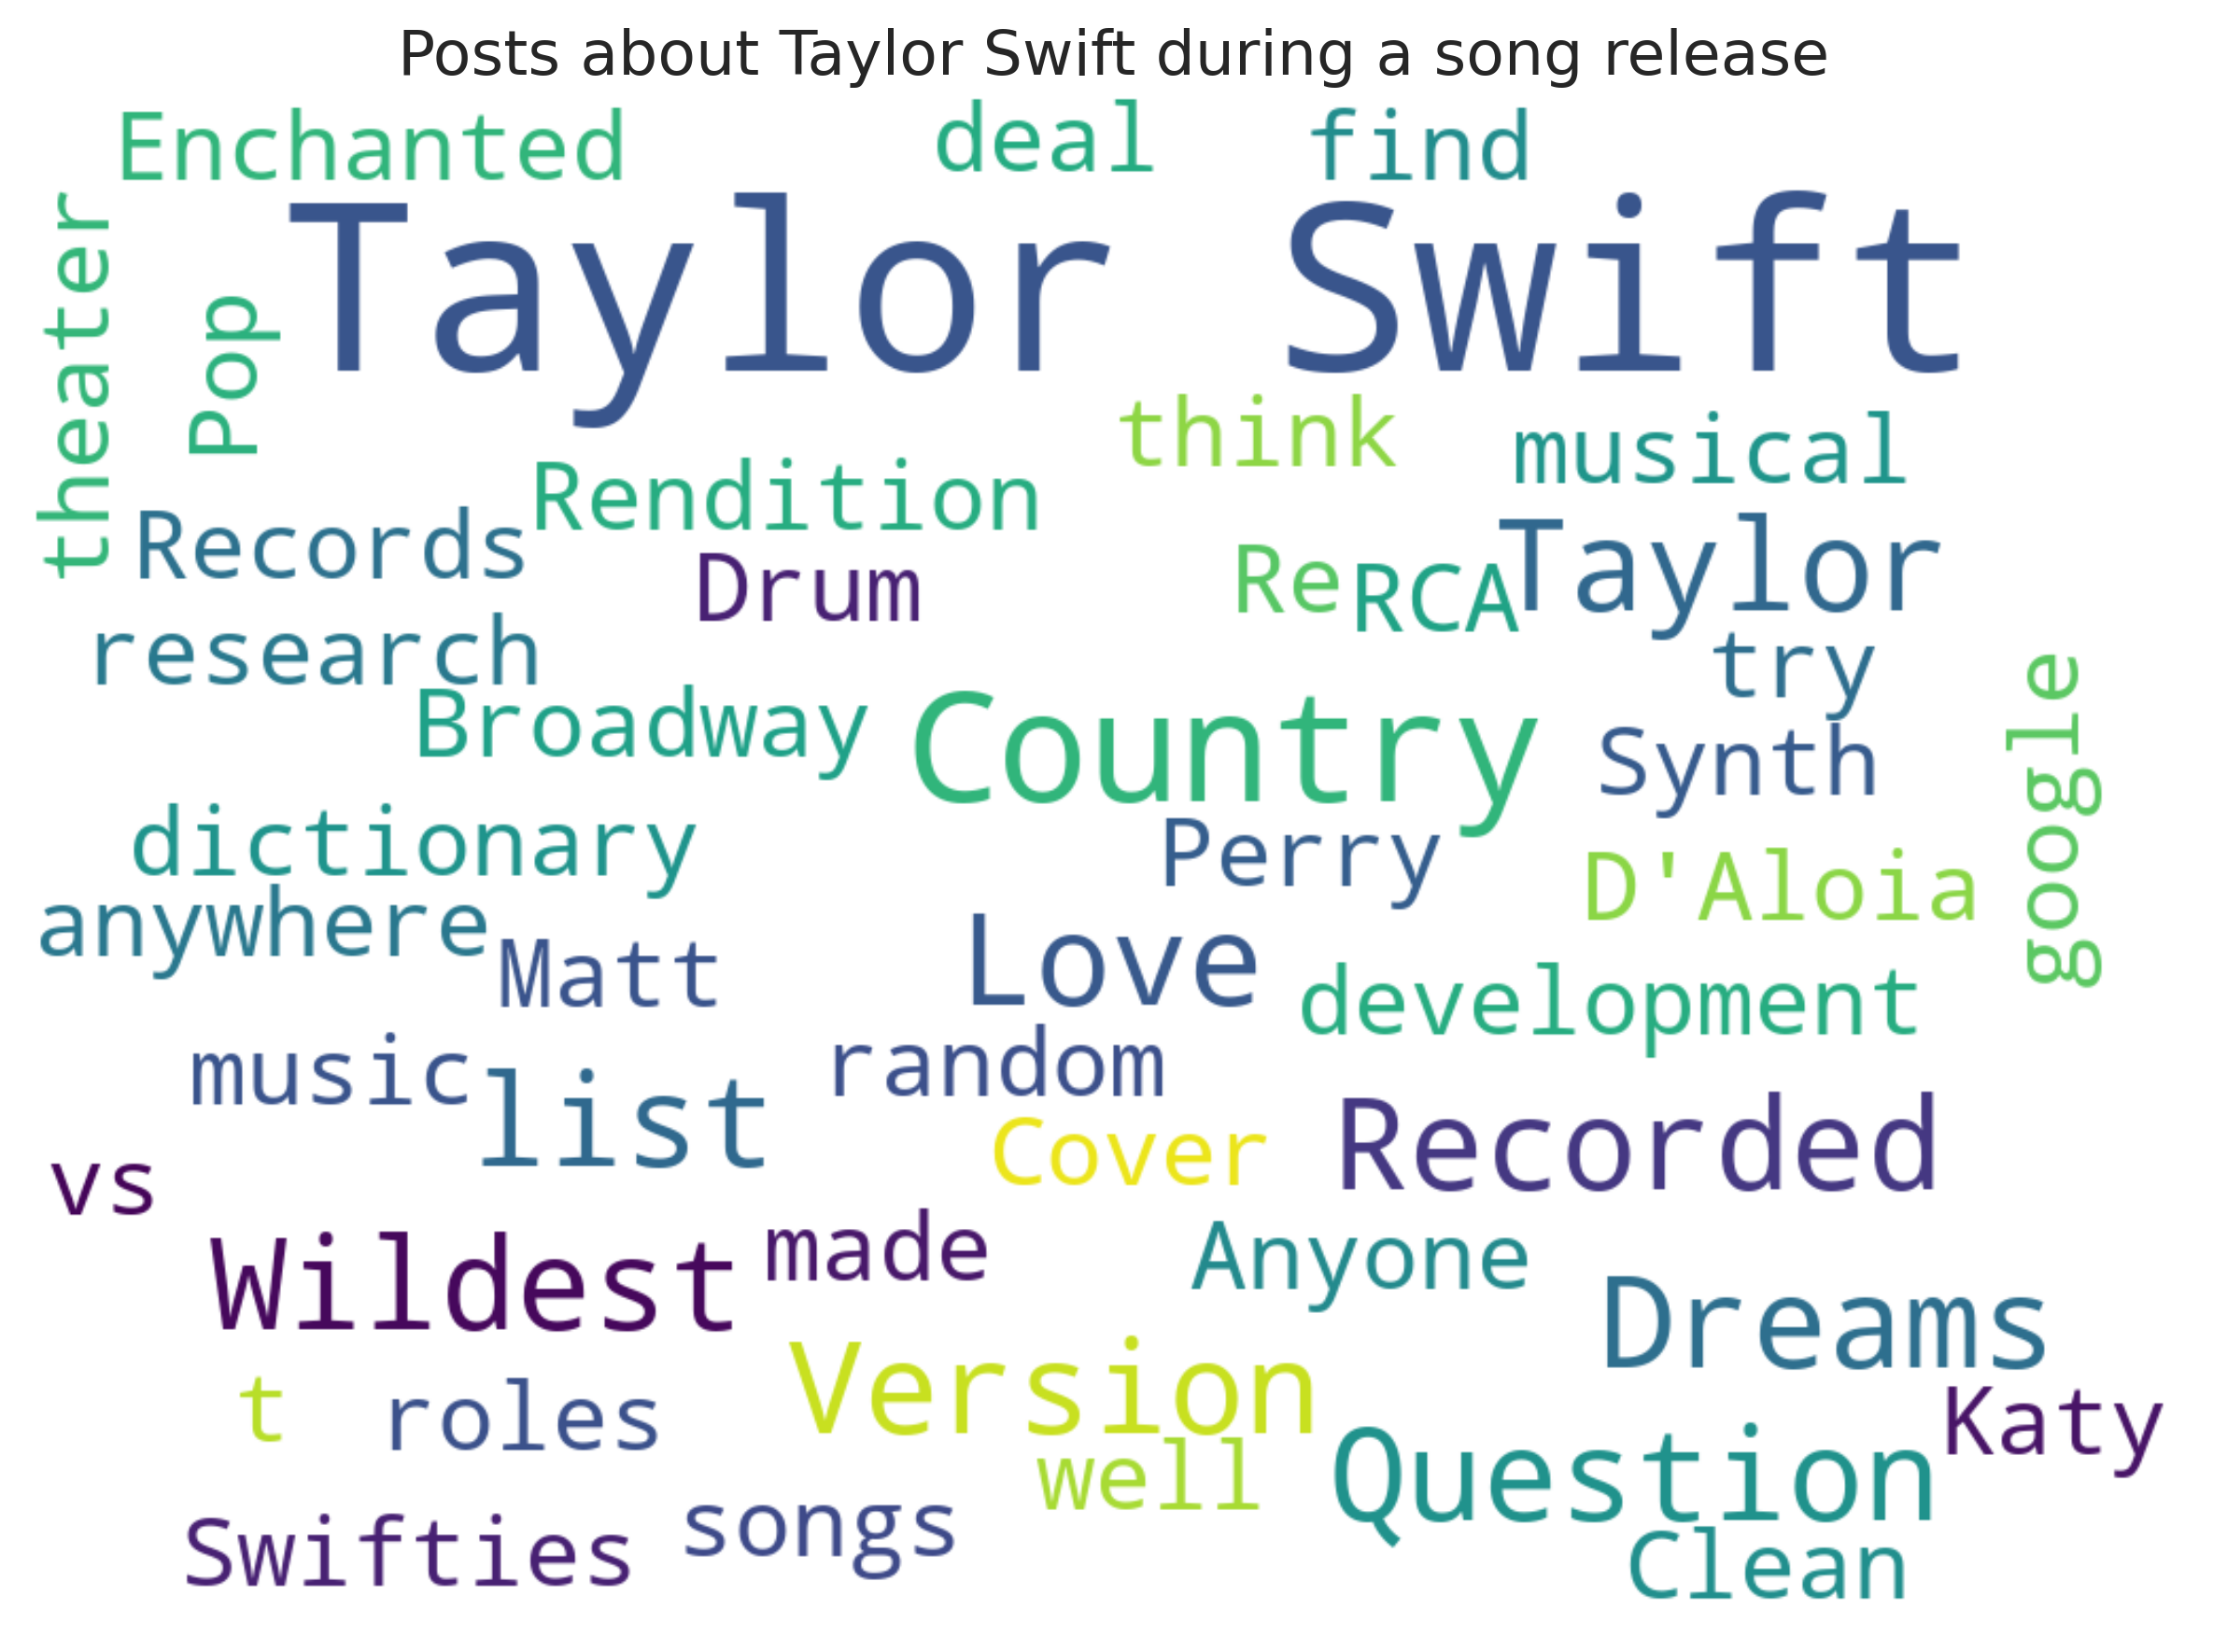

Number of posts: 13


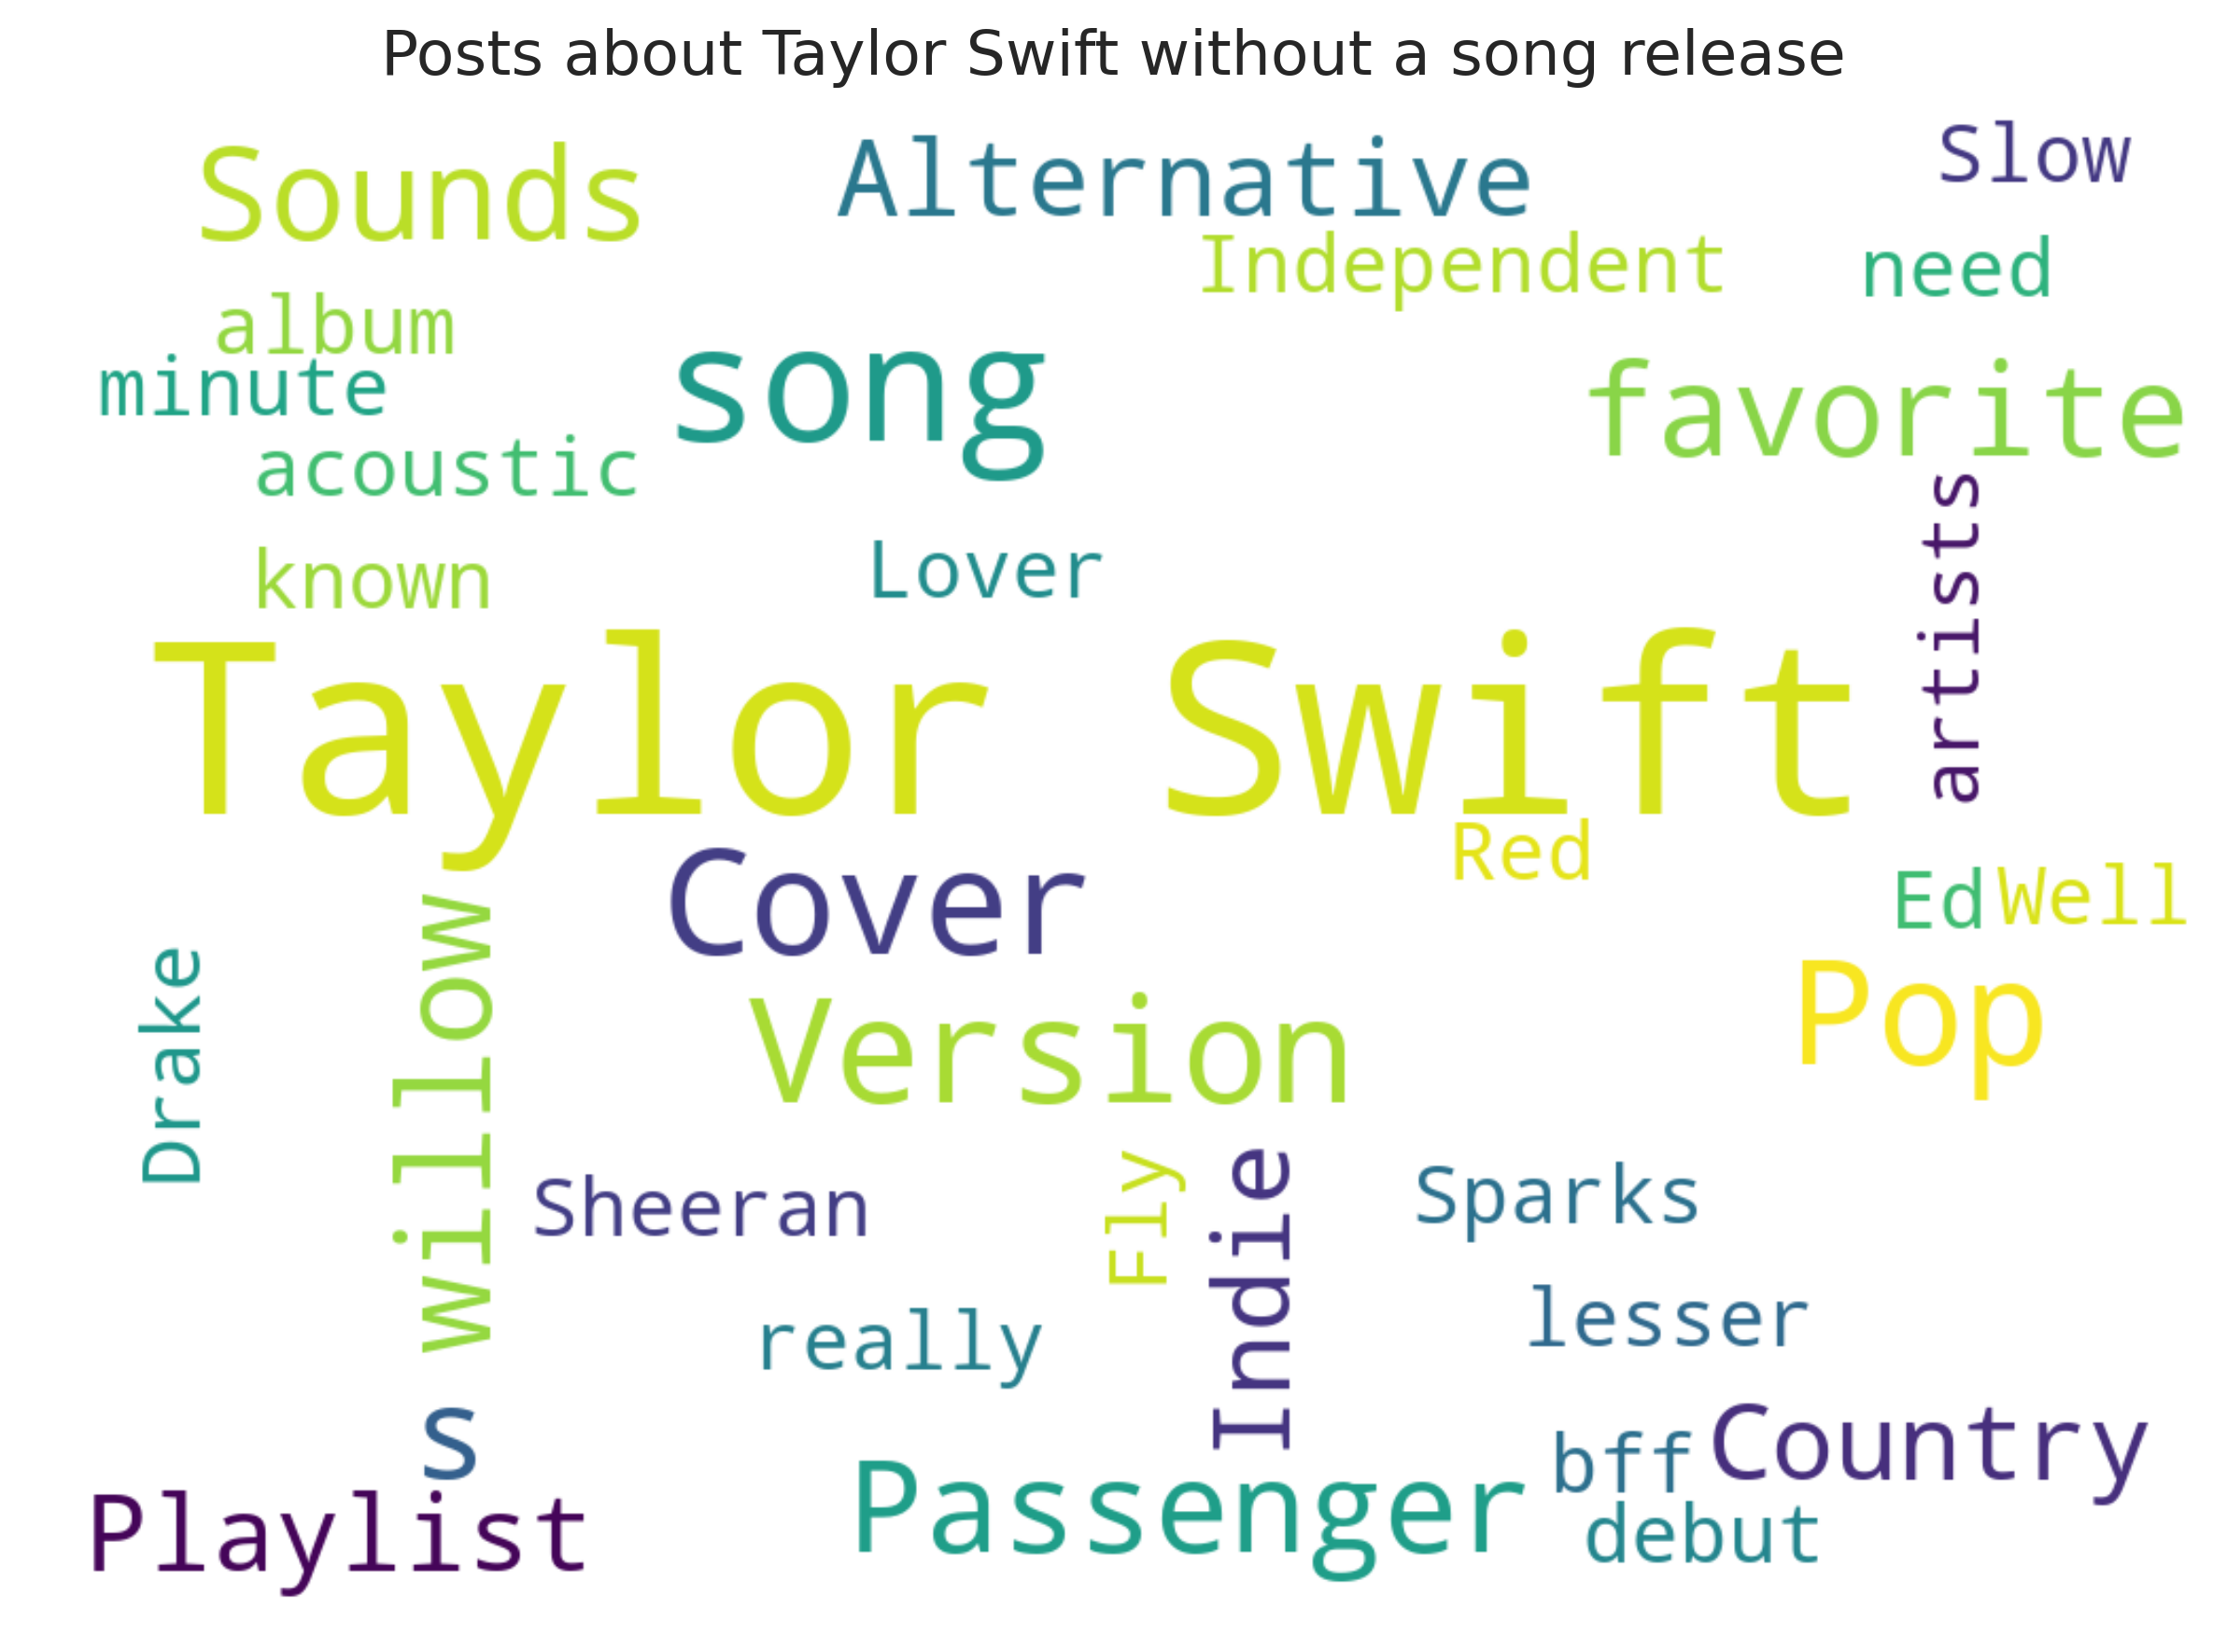

In [15]:
get_wordcloud('Taylor Swift', ['2022-05-06', '2022-05-08'], rel=True)
get_wordcloud('Taylor Swift', ['2022-07-17', '2022-07-19'], rel=False)

We use a simple metric which we will call the post-generating score to measure the post-generating capabilities of artists. It is defined as the percentage of the total number of releases that aligned with a Reddit post peak. For example, the three artists used above have post-generating scores shown below when the peak is defined as any non-zero post. Taylor Swift's score of 0.400 means that 40% of Taylor Swift's releases align with Reddit post peaks.

We can be more conservative with our definition of a post peak and say that a peak is a date with, for example, three or more Reddit posts. This can be thought of as a standard for the virality of a release. This is bound to lower the scores, but it also changes the ranking of the artists according to score.

In [16]:
print('Peak threshold: 1')
for artist in ['Katy Perry', 'Ed Sheeran', 'Taylor Swift']:
    print(f'The post-generating score of {artist} is {get_score(artist):.3f}')

Peak threshold: 1
The post-generating score of Katy Perry is 0.292
The post-generating score of Ed Sheeran is 0.448
The post-generating score of Taylor Swift is 0.400


In [17]:
print('Peak threshold: 3')
for artist in ['Katy Perry', 'Ed Sheeran', 'Taylor Swift']:
    print(
        f'The post-generating score of {artist} is {get_score(artist, thres=3):.3f}'
    )

Peak threshold: 3
The post-generating score of Katy Perry is 0.042
The post-generating score of Ed Sheeran is 0.034
The post-generating score of Taylor Swift is 0.067


The table and figure below show the statistics and histogram, respectively, of the post-generating scores of the top 1000 artists based on number of releases. Only 514 out of the 1000 artists have at least one match in a Reddit post. 210 out of these 514 artists have a post-generating score of zero which means they were talked about in Reddit but none of the posts aligned with the releases. The mean score is 0.189 which means that on the average, releases generate Reddit posts only about 20% of the time.

A less conservative approach is to put a tolerance in the matching of dates. A tolerance of one day means the release is still considered "post-generating" if a peak occurs within a vicinity of one day from the release date. Putting a tolerance would account for timezone differences and, to some extent, early leakage of releases. The tolerance improved the mean score from 0.189 to 0.331 and lessened the occurrence of zero post-generating score from 209 to 139.

  0%|          | 0/1000 [00:00<?, ?it/s]

Zero tolerance applied:
Number of artists with no matches: 486
Number of artists with zero score: 209
Mean score: 0.189
Std. dev. score: 0.245


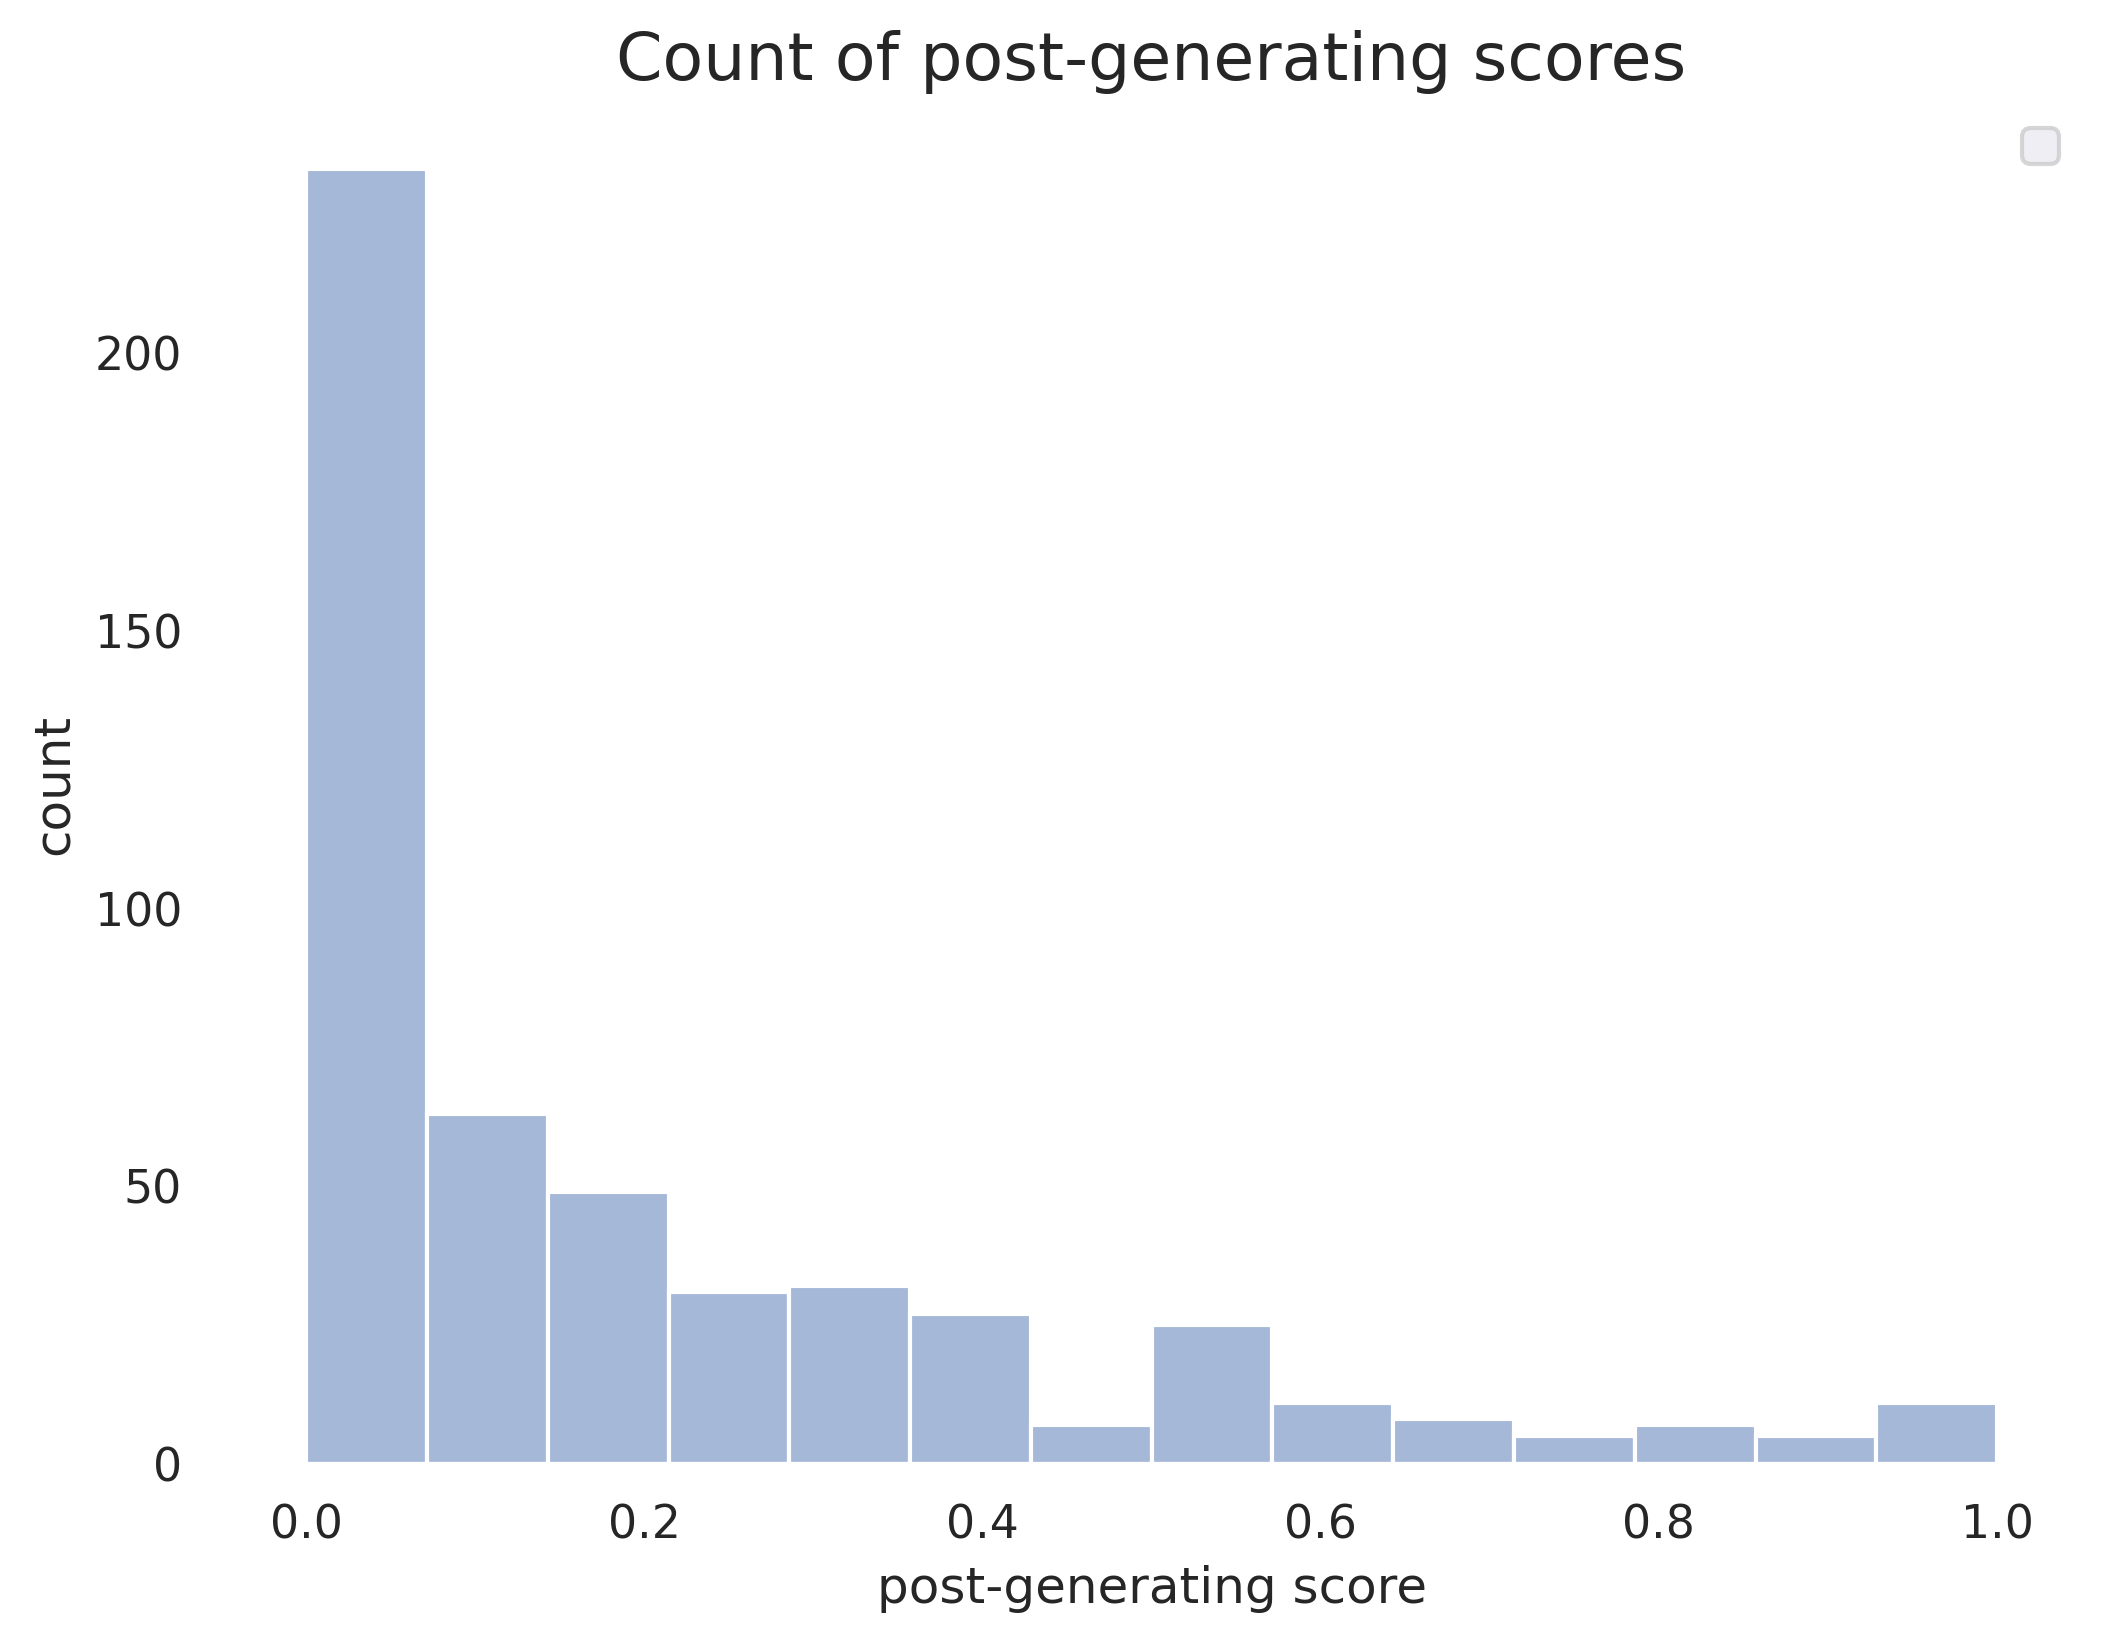

In [18]:
score_df = get_scores(tol=0)
get_stats(score_df)

  0%|          | 0/1000 [00:00<?, ?it/s]

Zero tolerance applied:
Number of artists with no matches: 486
Number of artists with zero score: 139
Mean score: 0.331
Std. dev. score: 0.331


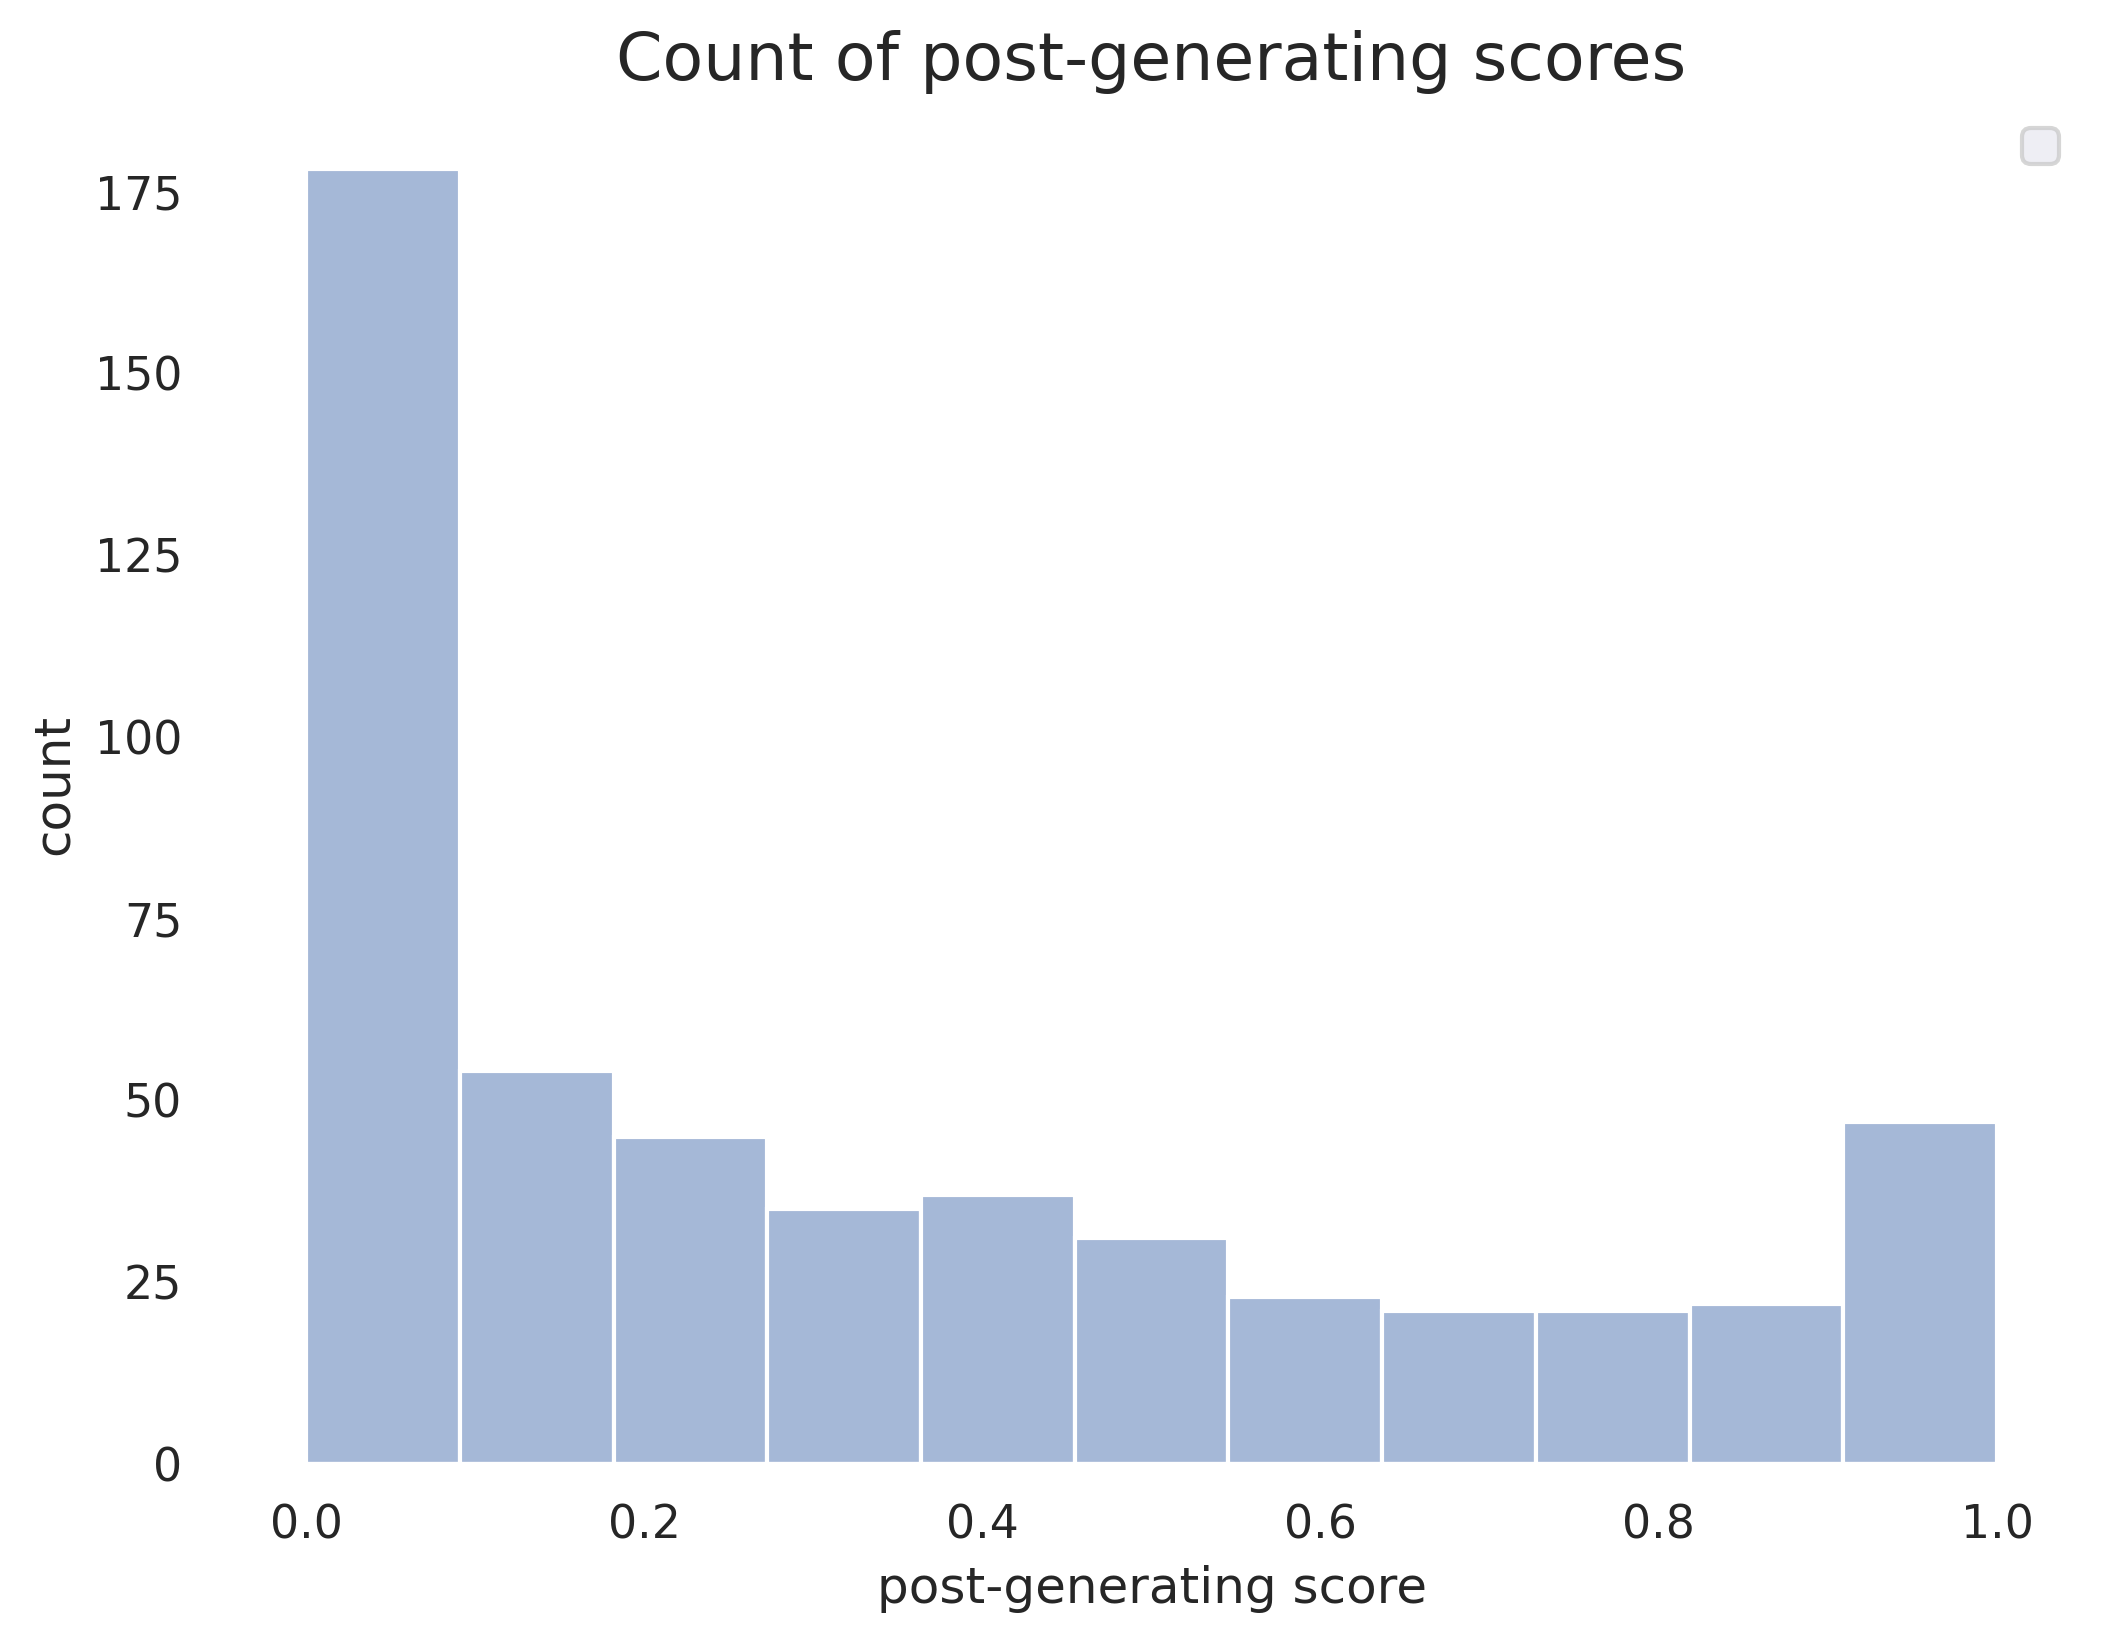

In [19]:
score_df = get_scores(tol=1)
get_stats(score_df)

## Results

From the analyses, we were able to compare the trends of Reddit posts before, during, and after music release. There are roughly 25k Reddit posts that precedes releases, 4.4k posts that occur during releases, and 24k posts that follow releases. Moreover, we were able to quantify the alignment of music releases with Reddit posts by introducing a so-called post-generating score. For the top 1000 artists based on number of releases, the mean score is 33% when a tolerance of one day for the alignment is used. We expect this value to be even smaller when artists with fewer releases are included in the analysis.

From the results, it is difficult to prescribe an optimal time to release a song. But we can clearly conclude that there's significant activity in Reddit music sub-reddits to get valuable insights from people, as initial measures indicate that 68.85% of the topics relate to the releases.

We note that only about 50k out of 160k releases were mentioned in the processed Reddit posts. This means that the trends are not representative of the majority of artists. This is due to the data- and computing time-related issues mentioned in the data cleaning section. One factor that prevented us from exclusively tagging a Reddit post to a Discog release is the fact that some posts contain multiple releases. Another factor that might have skewed the results is the existence of generic titles that might have been used in the usual sense of the word/phrase and do not necessarily pertain to the release. The analysis would have worked better if we focus on a smaller number of releases and included all Reddit posts and even comments. However, using a smaller sample size might prevent us from providing insights that encompass the whole population of releases. 

## Technical Recommendations

The following activities may be able to streamline the data processing and improve generated analyses. 

1. The files we have are ideal for initial loads but for a continuous analysis we recommend getting a delta (daily) of the files for processing. We can potentially get these via the platforms' respective APIs.
2. Trends can be better seen with a smaller number of releases since there are hundreds of releases per day. Narrowing the search to a specific release and artists can be done to effectively utilize the project we have created.
3. An ML algorithm may better illustrate and predict relationships between the timing of song releases and the peak of song or artist mentions on Reddit.  
4. NLP would be the best option to analyze all text components in our datasets. 
5. We did parallelism on some of the data loads and processing, but we are running on limited power. This can be further improved by using or having a more powerful machine. Computing power is one of the key limitations of any ETL / DMW activity.
6. This type of data set and analysis falls under the big data category, and it is recommended to load this into Hadoop or NoSQL databases to improve the efficiency of processing.
7. Domain expertise is required to discern which releases should we be focusing on.
8. Data quality should be one of the key areas to focus on for projects like this. Strict cleansing should be done to get more value out of the dataset. It is important to note that Discogs and Reddit posts quality varies.
9. We can also consider inclusion of other datasets available (e.g. Reddit comments, artist-specific subreddits)

## References

[[1] Caulfield, K. (2015). Why Are Albums Released on Tuesday (For Now) in the U.S.? Billboard. https://www.billboard.com/pro/album-release-day-why-tuesday/](https://www.billboard.com/pro/album-release-day-why-tuesday/)<br>
[[2] Malrowe, C. (2020). A pre-release strategy for putting out your next single. Bandzoogle. https://bandzoogle.com/blog/a-pre-release-strategy-for-putting-out-your-next-single](https://bandzoogle.com/blog/a-pre-release-strategy-for-putting-out-your-next-single) <br>
[[3] Skelton, E. (2018). Why Does So Much New Music Drop at the Same Time Each Friday? Complex. https://www.complex.com/pigeons-and-planes/2018/05/why-does-so-much-music-release-friday-each-week](https://www.complex.com/pigeons-and-planes/2018/05/why-does-so-much-music-release-friday-each-week) <br>

## Glossary

* Discogs is a database of information about audio recordings, including commercial releases, promotional releases, and bootleg or off-label releases.
* Reddit is an American social news aggregation, content rating, and discussion website.      
* Subreddit is basically a thread of posts in the Reddit Site. This permits users to focus on a specific topic they are interested in.
* Word Cloud is a cluster of words depicted in varying sizes. The word that is often mentioned appears to be bigger, bolder and more prominent signifies that it is more important than the rest.
* Spotify is an audio streaming and media services provider that offers digital copyright restricted recorded music and podcasts, including more than 82 million songs, from record labels and media companies.